# Fichier descriptif de projet: Projet de statistiques exploratoires sous Python

Le projet consiste principalement à utiliser un jeu de données réelles issu de l’assurance **Zenor** afin de découvrir les statistiques exploratoires sous Python. Un fonctionnement en mode projet vous permettra de vous rapprocher des méthodes de travail appliquées en entreprises.

## Objectifs du projet

L’objectif du projet est de comprendre les enjeux de l’analyse de données brutes et ce, jusqu'à l'étape de restitution des résultats. A l'issue de cette étude, les étudiants devront :

- connaître les commandes Python permettant de produire des statistiques de base ;
- être capables de choisir et mener des analyses descriptives sur Python ;
- savoir synthétiser les résultats obtenus dans un rapport répondant précisément aux objectifs formulés ;

## Modalités du projet

Les étudiants travailleront lors des cours programmés. Chaque étudiant sera évalué sur l’ensemble des livrables à remettre.

## Problématique

Un nouveau responsable commercial vient de prendre ses fonctions au sein de la société d’assurance Zenor, spécialisée sur le risque 2-roues motorisés. Il ne connait pas l’activité de l’entreprise sur les 3 dernières années et veut atteindre les objectifs suivants:

- augmenter la performance financière ;
  
- attirer plus de moins de 30 ans.

Vous êtes un data analyst et vous devez fournir aux dirigeants les insights qui leur permettront de comprendre l’activité pour qu’il puisse atteindre les objectifs fixés.

Dans un premier temps, le responsable commercial souhaite obtenir :

- un profil des clients : qui sont-ils en matière d’âge, de sexe, de lieu d’habitation, … ? quels contrats possèdent-ils : garanties, quel type de 2-roues, quelle formule d’assurance, … ?

- un tableau de bord contenant quelques indicateurs qui lui permettront de suivre l’activité. Ce tableau de bord devra être accompagné d’une analyse des résultats présentés sous forme de tableau(x). Au cours de vos investigations, en fonction des résultats obtenus, vous pourrez prendre une orientation non envisagée au départ afin d’affiner votre analyse et vos conclusions.

## Organisation et étapes du projet

Les points suivants seront abordés et traités par les étudiants à l’aide des techniques et méthodes étudiées en cours :

- Comprendre et analyser la demande : vous devrez bien identifier les objectifs de l'étude demandée et poser d’éventuelles questions si ce n’est pas clair pour vous.

- Inventorier les données existantes et y apporter un regard critique. Explorer et préparer les données : éventuellement transformer les données, créer de nouvelles variables...

## Analyse de la base de données.

- Définir les indicateurs clefs qui vont permettre d’aider le responsable commercial pour suivre l’activité de ses services.

- Établir un tableau de bord contenant ces indicateurs.

- Proposer des actions pour atteindre les objectifs stratégiques ?

## Livrables

Un rapport synthétique contenant :

- le profil des sociétaires et de leurs contrats ;

- le tableau de bord et son analyse ;

- les actions proposées pour atteindre les objectifs.

Une présentation orale de ces éléments en 15 minutes par groupe.

Un rapport individuel sur le déroulé de ce cours sous forme de projet : comment vous avez vaincu le projet, quelles ont été vos difficultés, comment vous les avez surmontées, qu’est-ce que vous en retenez pour la suite de votre vie professionnelle. Ce rapport individuel sera noté sur la qualité de rédaction.



# Méthodologie
- Premièrement, le rapport présente une évaluation détaillée de la situation financière actuelle de Zenor, mettant en exergue les tendances clés en matière de souscription et de chiffre d'affaires à travers différentes formules et produits d'assurance, ainsi que modalités de paiement. 

- Deuxièmement, une analyse démographique des clients de l'entreprise révèle des informations essentielles sur leur profil socio-professionnel, la répartition territoire, ainsi que les préférences d'âge et de genre, fournissant des indications précieuses pour affiner les stratégies de marché. 

- Troisièmement, le rapport examine les types et marques de véhicules les plus fréquemment assurés, dévoilant des opportunités pour des stratégies d'assurance ciblées. 

- Enfin, une synthèse consolidée expose les recommandations stratégiques et ébauche une conclusion prospective.


# Démarrer le projet

In [1]:
import pandas as pd
import os
pd.options.display.max_columns = None

## Importer et traiter BDD

BDD_CONTRAT.txt

BDD_SOC.txt

BDD_VEHICULE.txt

### Importer et traiter le fichier Contrat

In [2]:
data_contrat = pd.read_csv('BDD_CONTRAT.txt', sep='\t')
data_contrat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92304 entries, 0 to 92303
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   contrat_id             92304 non-null  int64 
 1   societaire_nu          92304 non-null  int64 
 2   canal_souscription_cd  92304 non-null  object
 3   saisie_contrat_dt      92304 non-null  object
 4   contrat_distrib_lb     92304 non-null  object
 5   produit_cd             92304 non-null  object
 6   formule_cd             92304 non-null  object
 7   prime_annuelle_ht_mt   92304 non-null  object
 8   partenaire_cd          92304 non-null  object
 9   fractionnement_cd      92304 non-null  object
dtypes: int64(2), object(8)
memory usage: 7.0+ MB


In [3]:
data_contrat['prime_annuelle_ht_mt'].head()

0    294,42000
1    187,91000
2    379,26000
3    545,49000
4    299,84000
Name: prime_annuelle_ht_mt, dtype: object

In [4]:
# Def une fonction pour remplacer la virgule par le point et supprimmer les 0 redondants
def format_prime(input_prime):
    formatted_prime = input_prime.replace(',', '.')
    if len(formatted_prime) > 3:
        formatted_prime = formatted_prime[:-3]
    else:
        formatted_prime = '' 
    return formatted_prime

In [5]:
test = format_prime('242,999000')
test

'242.999'

In [6]:
# Metre à jour la colonne 'prime_annuelle_ht_mt' du DataFrame 'data_contrat' en appliquant la fonction 'format_prime' à chaque élément.
data_contrat['prime_annuelle_ht_mt'] = data_contrat['prime_annuelle_ht_mt'].apply(lambda x: format_prime(x))

In [7]:
# Transformer en numérique
data_contrat['prime_annuelle_ht_mt'] = pd.to_numeric(data_contrat['prime_annuelle_ht_mt'])

In [8]:
# Vérifier le CAHT TOTAL
data_contrat['prime_annuelle_ht_mt'].sum()

38923597.76

In [9]:
data_contrat['saisie_contrat_dt'] = pd.to_datetime(data_contrat['saisie_contrat_dt'])

In [10]:
data_contrat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92304 entries, 0 to 92303
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   contrat_id             92304 non-null  int64         
 1   societaire_nu          92304 non-null  int64         
 2   canal_souscription_cd  92304 non-null  object        
 3   saisie_contrat_dt      92304 non-null  datetime64[ns]
 4   contrat_distrib_lb     92304 non-null  object        
 5   produit_cd             92304 non-null  object        
 6   formule_cd             92304 non-null  object        
 7   prime_annuelle_ht_mt   92304 non-null  float64       
 8   partenaire_cd          92304 non-null  object        
 9   fractionnement_cd      92304 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(6)
memory usage: 7.0+ MB


In [11]:
data_contrat.head()

,contrat_id,societaire_nu,canal_souscription_cd,saisie_contrat_dt,contrat_distrib_lb,produit_cd,formule_cd,prime_annuelle_ht_mt,partenaire_cd,fractionnement_cd
0,1262361,956602,TE,2020-09-09,En direct,PSTD,PSTD3,294.42,-1,A
1,1307994,966728,BU,2022-05-03,Courtage,PAUTH,PAUTH2,187.91,AGPM,A
2,1309485,967063,BU,2020-11-03,En direct,PSTD,PSTD3,379.26,-1,A
3,1309567,967083,BU,2023-07-12,En direct,PSTD,PSTD3,545.49,-1,M
4,1309872,967144,TE,2023-09-23,En direct,PAUTH,PAUTH1,299.84,-1,A


| canal_souscription_cd |           | produit_cd |                      | formule_cd |          | partenaire_cd              |               | fractionnement_cd |             |
| --------------------- | --------- | ---------- | -------------------- | ---------- | -------- | -------------------------- | ------------- | ----------------- | ----------- |
| Modalités             | Libellés  | Modalités  | Libellés             | Modalités  | Libellés | Modalités                  | Libellés      | Modalités         | Libellés    |
| BU                    | Bureau    | PAUTH      | Authentique          | 1          | RC       | -1                         | Vente directe | A                 | Annuel      |
| CP                    | Internet  | PCIRC      | Circuit              | 2          | VOL      | Toutes les autres  valeurs | Partenaire    | M                 | Mensuel     |
| CR                    | Internet  | PCOLL      | Collection           | 3          | TA       |                            |               | S                 | Semestriel  |
| CT                    | Internet  | PCOURC     | Coursier             | 4          | RCHC     |                            |               | T                 | Trimestriel |
| IN                    | Internet  | PCOURCA    | Coursier alimentaire |            |          |                            |               |                   |             |
| OUT                   | Salon     | PCOURM     | Coursier             |            |          |                            |               |                   |             |
| SA                    | Salon     | PCOURMA    | Coursier alimentaire |            |          |                            |               |                   |             |
| TE                    | Téléphone | PEDPM      | EDPM                 |            |          |                            |               |                   |             |
| WW                    | Internet  | PMOTA      | Ma perso             |            |          |                            |               |                   |             |
|                       |           | PMPS       | Ma perso             |            |          |                            |               |                   |             |
|                       |           | PMVL       | Vert Loisirs         |            |          |                            |               |                   |             |
|                       |           | PRLOU      | Loueurs              |            |          |                            |               |                   |             |
|                       |           | PRLOUC     | Loueurs              |            |          |                            |               |                   |             |
|                       |           | PRSPEC     | Risques Spéciaux     |            |          |                            |               |                   |             |
|                       |           | PRSPEM     | Risques Spéciaux     |            |          |                            |               |                   |             |
|                       |           | PRSTD      | Standard             |            |          |                            |               |                   |             |
|                       |           | PRTRT      | Standard             |            |          |                            |               |                   |             |
|                       |           | PRURBS     | Urban Scoot          |            |          |                            |               |                   |             |
|                       |           | PRVLH      | Vert Loisirs         |            |          |                            |               |                   |             |
|                       |           | PRVLN      | Vert Loisirs         |            |          |                            |               |                   |             |
|                       |           | PSCOL      | Scolaire             |            |          |                            |               |                   |             |
|                       |           | PSTD       | Standard             |            |          |                            |               |                   |             |
|                       |           | PURBS      | Urban Scoot          |            |          |                            |               |                   |             |
|                       |           | PVAE       | VAE                  |            |          |                            |               |                   |             |

### Importer et traiter le fichier Sociétaire

In [12]:
data_soc = pd.read_csv('BDD_SOC.txt', sep='\t')
print(data_soc.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77657 entries, 0 to 77656
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   societaire_nu               77657 non-null  int64  
 1   personne_id                 77657 non-null  int64  
 2   code_postal_cd              77627 non-null  object 
 3   societaire_anciennete_dt    77657 non-null  object 
 4   societaire_sexe_cd          77657 non-null  int64  
 5   societaire_naissance_dt     74723 non-null  object 
 6   bureau_gestion_cd           77657 non-null  int64  
 7   societaire_drom_pom_com_in  77619 non-null  object 
 8   societaire_csp_cd           74723 non-null  float64
dtypes: float64(1), int64(4), object(4)
memory usage: 5.3+ MB
None


In [13]:
# Transformer la date de naissance en format date-time
data_soc['societaire_naissance_dt'] = pd.to_datetime(data_soc['societaire_naissance_dt'], errors='coerce')

In [14]:
data_soc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77657 entries, 0 to 77656
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   societaire_nu               77657 non-null  int64         
 1   personne_id                 77657 non-null  int64         
 2   code_postal_cd              77627 non-null  object        
 3   societaire_anciennete_dt    77657 non-null  object        
 4   societaire_sexe_cd          77657 non-null  int64         
 5   societaire_naissance_dt     74723 non-null  datetime64[ns]
 6   bureau_gestion_cd           77657 non-null  int64         
 7   societaire_drom_pom_com_in  77619 non-null  object        
 8   societaire_csp_cd           74723 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(4), object(3)
memory usage: 5.3+ MB


In [15]:
# Compter les occurrences uniques dans 'societaire_csp_cd' de 'data_soc'.
data_soc['societaire_csp_cd'].value_counts()

societaire_csp_cd
-1.0     31732
 40.0    22100
 20.0     4572
 50.0     3544
 12.0     3062
 62.0     2606
 30.0     2327
 61.0     1476
 14.0     1386
 64.0      821
 63.0      401
 11.0      379
 13.0      298
 65.0       19
Name: count, dtype: int64

In [16]:
# Remplacer les valeurs manquantes dans 'societaire_csp_cd' de 'data_soc' par -1, puis convertir cette colonne en entiers.
data_soc['societaire_csp_cd'] = data_soc['societaire_csp_cd'].fillna(-1)
data_soc['societaire_csp_cd'] = data_soc['societaire_csp_cd'].astype(int)

In [17]:
data_soc.head()

,societaire_nu,personne_id,code_postal_cd,societaire_anciennete_dt,societaire_sexe_cd,societaire_naissance_dt,bureau_gestion_cd,societaire_drom_pom_com_in,societaire_csp_cd
0,92,198948,62400,01Apr1996,2,1952-12-01,166,A,61
1,108,198964,92120,01Jan1997,2,1958-09-08,117,A,12
2,115,198971,20090,01Apr1996,2,1958-02-02,33,A,30
3,128,198984,08000,25Apr2021,2,1959-08-07,103,A,-1
4,148,199004,13011,17Jun1999,2,1959-06-04,33,A,40


| societaire_sexe_cd |          | bureau_gestion_cd |                     | societaire_csp_cd |                                            | societaire_drom_pom_com_in |                        |
| ------------------ | -------- | ----------------- | ------------------- | ----------------- | ------------------------------------------ | -------------------------- | ---------------------- |
| Modalités          | Libellés | Modalités         | Libellés            | Modalités         | Libellés                                   | Modalité                   | Libellé de la modalité |
| 1                  | Homme    | 9                 | Bordeaux            | 11                | Agriculteurs  exploitants                  | A                          | Métropole              |
| 2                  | Femme    | 11                | Saint Jean de Védas | 12                | Artisans commerçants                       | C                          | Outre-Mer              |
|                    |          | 13                | Saint Etienne       | 13                | Chef d'entreprises de  plus de 10 salariés | D                          | Outre-Mer              |
|                    |          | 17                | Cannes              | 14                | Professions libérales  et artistiques      | M                          | Outre-Mer              |
|                    |          | 23                | Strasbourg          | 20                | Cadres                                     | P                          | Outre-Mer              |
|                    |          | 27                | Rouen               | 30                | Professions  intermédiaires                |                            |                        |
|                    |          | 30                | Toulon              | 40                | Employés                                   |                            |                        |
|                    |          | 33                | Marseille           | 50                | Ouvriers                                   |                            |                        |
|                    |          | 36                | Nimes               | 61                | Retraités                                  |                            |                        |
|                    |          | 39                | Grenoble            | 62                | Etudiants                                  |                            |                        |
|                    |          | 41                | Nice                | 63                | En recherche d'emploi                      |                            |                        |
|                    |          | 46                | Rennes              | 64                | Sans activité  professionnelle             |                            |                        |
|                    |          | 51                | Lyon                | 70                | Personnes morales                          |                            |                        |
|                    |          | 53                | Dardilly            | -1                | Non connu                                  |                            |                        |
|                    |          | 62                | Clermont Ferrand    |                   |                                            |                            |                        |
|                    |          | 64                | Annecy              |                   |                                            |                            |                        |
|                    |          | 66                | Nantes              |                   |                                            |                            |                        |
|                    |          | 68                | Toulouse            |                   |                                            |                            |                        |
|                    |          | 74                | Lille               |                   |                                            |                            |                        |
|                    |          | 84                | Tours               |                   |                                            |                            |                        |
|                    |          | 90                | Paris Haussmann     |                   |                                            |                            |                        |
|                    |          | 92                | Paris Lyon          |                   |                                            |                            |                        |
|                    |          | 99                | Montpellier         |                   |                                            |                            |                        |
|                    |          | 103               | Metz                |                   |                                            |                            |                        |
|                    |          | 104               | Bayonne             |                   |                                            |                            |                        |
|                    |          | 105               | Limoges             |                   |                                            |                            |                        |
|                    |          | 107               | Aix en Provence     |                   |                                            |                            |                        |
|                    |          | 111               | Caen                |                   |                                            |                            |                        |
|                    |          | 112               | Valence             |                   |                                            |                            |                        |
|                    |          | 113               | Poitiers            |                   |                                            |                            |                        |
|                    |          | 117               | Spécial             |                   |                                            |                            |                        |
|                    |          | 118               | Agen                |                   |                                            |                            |                        |
|                    |          | 122               | Orléans             |                   |                                            |                            |                        |
|                    |          | 131               | Dijon               |                   |                                            |                            |                        |
|                    |          | 136               | Ile de la Réunion   |                   |                                            |                            |                        |
|                    |          | 138               | Amiens              |                   |                                            |                            |                        |
|                    |          | 139               | Brest               |                   |                                            |                            |                        |
|                    |          | 147               | Mont de Marsan      |                   |                                            |                            |                        |
|                    |          | 151               | Nancy               |                   |                                            |                            |                        |
|                    |          | 153               | Guadeloupe          |                   |                                            |                            |                        |
|                    |          | 154               | Martinique          |                   |                                            |                            |                        |
|                    |          | 155               | Guyane              |                   |                                            |                            |                        |
|                    |          | 156               | Polynésie Française |                   |                                            |                            |                        |
|                    |          | 157               | Nouvelle Calédonie  |                   |                                            |                            |                        |
|                    |          | 159               | Paris Maine         |                   |                                            |                            |                        |
|                    |          | 165               | Marseille 2         |                   |                                            |                            |                        |
|                    |          | 166               | Lille 2             |                   |                                            |                            |                        |

### Importer et traiter le fichier Véhicule

In [18]:
data_veh = pd.read_csv('BDD_VEHICULE.txt', sep='\t')

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x91 in position 211440: invalid start byte

In [19]:
try:
    data_veh = pd.read_csv('BDD_VEHICULE.txt', sep='\t', encoding='utf-8')
except UnicodeDecodeError:
    data_veh = pd.read_csv('BDD_VEHICULE.txt', sep='\t', encoding='ISO-8859-1')
print(data_veh.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233282 entries, 0 to 233281
Data columns (total 4 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   contrat_id           233282 non-null  int64 
 1   mise_circulation_dt  232138 non-null  object
 2   vocation_cd          233282 non-null  object
 3   marque_vehicule_lb   233282 non-null  object
dtypes: int64(1), object(3)
memory usage: 7.1+ MB
None


In [20]:
data_veh.head()

,contrat_id,mise_circulation_dt,vocation_cd,marque_vehicule_lb
0,1262361,01Jun2013,TM,BMW
1,1307994,01Jan2007,B,KAWASAKI
2,1309485,01Aug2018,TMR,HONDA
3,1309567,01Jul2017,BS,BMW
4,1309872,01Mar2007,SCS,YAMAHA


| vocation_cd   |                        |
| ------------- | ---------------------- |
| **Modalités** | **Libellés**           |
| B             | Basique                |
| BS            | Basique Sportive       |
| C3R           | 3-roues                |
| CR            | Cross                  |
| CS            | Custom                 |
| CU            | Custom                 |
| EGY           | EDPM                   |
| EGYR          | EDPM                   |
| EMO           | EDPM                   |
| EMON          | EDPM                   |
| EN            | Enduro                 |
| ESK           | EDPM                   |
| ESKA          | EDPM                   |
| ETR           | EDPM                   |
| ETRO          | EDPM                   |
| GT            | Grand tourisme         |
| GTS           | Grand tourisme sportif |
| HYS           | Hypersport             |
| PRO           | VAE                    |
| QM1           | Quad                   |
| QM2           | Quad                   |
| QU            | Quad                   |
| RS            | Routière Sportive      |
| S32           | Scooter 3-roues        |
| SB            | Sport Basique          |
| SC3           | Scooter                |
| SCB           | Scooter                |
| SCG           | Scooter                |
| SCS           | Scooter                |
| SGR           | Scooter                |
| SI            | Side car               |
| SM            | Supermotard            |
| SS            | Supersport             |
| ST            | Sport tourisme         |
| T             | Trail                  |
| TM            | Trail                  |
| TM1           | Trail                  |
| TM2           | Trail                  |
| TMR           | Trail                  |
| TR            | Trial                  |
| TS            | Trail                  |
| VAE           | VAE                    |
| VAECA         | VAE                    |
| VAEPL         | VAE                    |
| VAERO         | VAE                    |
| VAETA         | VAE                    |
| VAETT         | VAE                    |
| VAEUR         | VAE                    |

## Préparer à fusionner les données

In [21]:
data_veh.duplicated().sum()

121611

In [22]:
data_soc.duplicated().sum()

0

In [23]:
data_contrat.duplicated().sum()

0

In [24]:
# Trier 'data_veh' par 'contrat_id' et créer un nouveau DF sans les doublons
data_veh_sorted = data_veh.sort_values(by='contrat_id')
data_veh_nodup = data_veh_sorted.drop_duplicates(subset='contrat_id', keep='first')
data_veh_dup = data_veh_sorted[data_veh_sorted.duplicated(subset='contrat_id', keep=False)]
print(f"Data de véhicule sans doublons:")
data_veh_nodup.info()

Data de véhicule sans doublons:
<class 'pandas.core.frame.DataFrame'>
Index: 92304 entries, 0 to 233281
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   contrat_id           92304 non-null  int64 
 1   mise_circulation_dt  91263 non-null  object
 2   vocation_cd          92304 non-null  object
 3   marque_vehicule_lb   92304 non-null  object
dtypes: int64(1), object(3)
memory usage: 3.5+ MB


In [25]:
# Fusionner le fichier de contrat et client sur la clé primaire via une jointure interne,
data_soc = data_soc.sort_values(by='societaire_nu')
data_contrat = data_contrat.sort_values(by='societaire_nu')
soc_contrat = pd.merge(data_soc, data_contrat, on='societaire_nu', how='inner')
soc_contrat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92304 entries, 0 to 92303
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   societaire_nu               92304 non-null  int64         
 1   personne_id                 92304 non-null  int64         
 2   code_postal_cd              92271 non-null  object        
 3   societaire_anciennete_dt    92304 non-null  object        
 4   societaire_sexe_cd          92304 non-null  int64         
 5   societaire_naissance_dt     85578 non-null  datetime64[ns]
 6   bureau_gestion_cd           92304 non-null  int64         
 7   societaire_drom_pom_com_in  92253 non-null  object        
 8   societaire_csp_cd           92304 non-null  int64         
 9   contrat_id                  92304 non-null  int64         
 10  canal_souscription_cd       92304 non-null  object        
 11  saisie_contrat_dt           92304 non-null  datetime64

In [26]:
# Fusionner avec 'data_veh_nodup' sur 'contrat_id' via une jointure gauche
soc_contrat = soc_contrat.sort_values(by='contrat_id')
soc_contrat_vehnodup = pd.merge(soc_contrat, data_veh_nodup, on='contrat_id', how='left')
soc_contrat_vehnodup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92304 entries, 0 to 92303
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   societaire_nu               92304 non-null  int64         
 1   personne_id                 92304 non-null  int64         
 2   code_postal_cd              92271 non-null  object        
 3   societaire_anciennete_dt    92304 non-null  object        
 4   societaire_sexe_cd          92304 non-null  int64         
 5   societaire_naissance_dt     85578 non-null  datetime64[ns]
 6   bureau_gestion_cd           92304 non-null  int64         
 7   societaire_drom_pom_com_in  92253 non-null  object        
 8   societaire_csp_cd           92304 non-null  int64         
 9   contrat_id                  92304 non-null  int64         
 10  canal_souscription_cd       92304 non-null  object        
 11  saisie_contrat_dt           92304 non-null  datetime64

In [27]:
# Créer une copie de 'soc_contrat_vehnodup' dans un nouveau DataFrame 'datafinal' pour utiliser sans toucher les données originaux
datafinal = soc_contrat_vehnodup.copy()
datafinal.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92304 entries, 0 to 92303
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   societaire_nu               92304 non-null  int64         
 1   personne_id                 92304 non-null  int64         
 2   code_postal_cd              92271 non-null  object        
 3   societaire_anciennete_dt    92304 non-null  object        
 4   societaire_sexe_cd          92304 non-null  int64         
 5   societaire_naissance_dt     85578 non-null  datetime64[ns]
 6   bureau_gestion_cd           92304 non-null  int64         
 7   societaire_drom_pom_com_in  92253 non-null  object        
 8   societaire_csp_cd           92304 non-null  int64         
 9   contrat_id                  92304 non-null  int64         
 10  canal_souscription_cd       92304 non-null  object        
 11  saisie_contrat_dt           92304 non-null  datetime64

## Manipuler et Analyser les données

### Evolution de nombre de souscription

In [28]:
#Extraire l'année et le mois de la colonne 'saisie_contrat_dt' de 'datafinal', les stocker dans de nouvelles colonnes 'year' et 'month', créer une copie dans 'data_caht'

datafinal['year'] = datafinal['saisie_contrat_dt'].dt.year
datafinal['month'] = datafinal['saisie_contrat_dt'].dt.month
data_caht = datafinal.copy()
data_caht.head(1)

,societaire_nu,personne_id,code_postal_cd,societaire_anciennete_dt,societaire_sexe_cd,societaire_naissance_dt,bureau_gestion_cd,societaire_drom_pom_com_in,societaire_csp_cd,contrat_id,canal_souscription_cd,saisie_contrat_dt,contrat_distrib_lb,produit_cd,formule_cd,prime_annuelle_ht_mt,partenaire_cd,fractionnement_cd,mise_circulation_dt,vocation_cd,marque_vehicule_lb,year,month
0,956602,1095021,78630,06Sep2020,2,1973-03-16,92,A,-1,1262361,TE,2020-09-09,En direct,PSTD,PSTD3,294.42,-1,A,01Jun2013,TM,BMW,2020,9


In [29]:
# Regrouper 'data_caht' par 'year' et 'month', calculer la somme de 'prime_annuelle_ht_mt' et le nombre de contrats pour chaque groupe, puis réinitialiser l'index pour le nouveau DataFrame 'data_caht2'.

data_caht2 = data_caht.groupby(['year', 'month'])['prime_annuelle_ht_mt'].agg(caht='sum', nb_contrat='size').reset_index()
data_caht2

,year,month,caht,nb_contrat
0,2020,9,294.42,1
1,2020,11,3611.44,19
2,2020,12,36617.19,143
3,2021,1,370044.67,1040
4,2021,2,572315.03,1552
5,2021,3,726569.60,2206
6,2021,4,795465.94,2237
7,2021,5,797740.08,2257
8,2021,6,1017208.96,2630
9,2021,7,1074843.86,2689


In [30]:
data_caht3 = data_caht2[(data_caht2['year'].isin([2021, 2022, 2023]))]
data_caht3

,year,month,caht,nb_contrat
3,2021,1,370044.67,1040
4,2021,2,572315.03,1552
5,2021,3,726569.60,2206
6,2021,4,795465.94,2237
7,2021,5,797740.08,2257
8,2021,6,1017208.96,2630
9,2021,7,1074843.86,2689
10,2021,8,903734.56,2315
11,2021,9,1077743.56,2638
12,2021,10,985861.23,2458


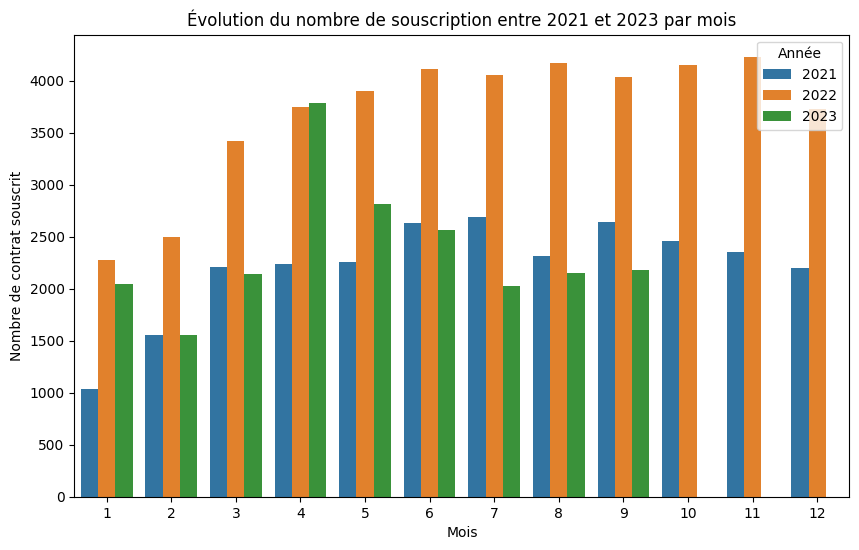

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='nb_contrat', hue='year', data=data_caht3)
plt.title('Évolution du nombre de souscription entre 2021 et 2023 par mois')
plt.xlabel('Mois')
plt.ylabel('Nombre de contrat souscrit')
plt.legend(title='Année', loc='upper right')
plt.show()


On constate une augmentation graduelle et marquée du nombre de souscriptions de 2021 à 2022, atteignant un sommet en novembre 2022. En revanche, en 2023, la tendance se montre volatile en termes de souscriptions, ce qui pourrait indiquer des variations sur le marché ou des défis non évidents dans les approches commerciales de l'entreprise.

### Evolution de CAHT

In [32]:
data_caht4 = data_caht3.copy()
data_caht4['monthyear'] = data_caht4['month'].astype(str) + '/' + data_caht4['year'].astype(str)
data_caht4

,year,month,caht,nb_contrat,monthyear
3,2021,1,370044.67,1040,1/2021
4,2021,2,572315.03,1552,2/2021
5,2021,3,726569.60,2206,3/2021
6,2021,4,795465.94,2237,4/2021
7,2021,5,797740.08,2257,5/2021
8,2021,6,1017208.96,2630,6/2021
9,2021,7,1074843.86,2689,7/2021
10,2021,8,903734.56,2315,8/2021
11,2021,9,1077743.56,2638,9/2021
12,2021,10,985861.23,2458,10/2021


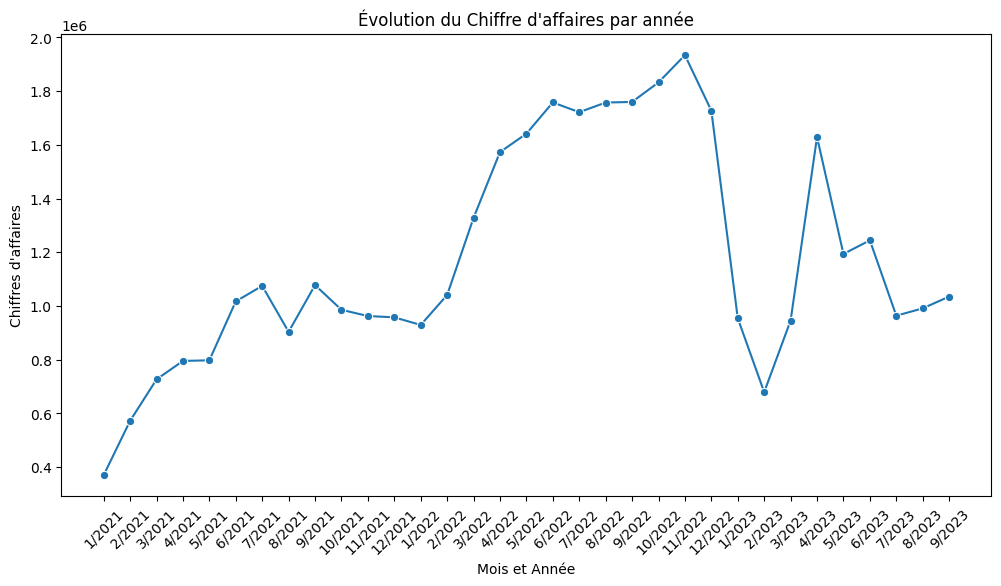

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.lineplot(x='monthyear', y='caht', data=data_caht4, marker='o')
plt.title("Évolution du Chiffre d'affaires par année")
plt.xlabel('Mois et Année')
plt.ylabel('Chiffres d\'affaires')
plt.xticks(rotation=45)
plt.show()


L'analyse de la période entre 2021 et 2022 révèle une hausse constante du CAHT durant le premier semestre, suivie d'une stabilisation pour la seconde moitié de l'année, ce qui pourrait indiquer une tendance de saisonnalité sur une base semestrielle. Toutefois, une diminution considérable est constatée entre décembre 2022 et février 2023, rompant avec le schéma saisonnier antérieur. Cette observation traduit une volatilité accrue dans les performances financières de l'entreprise, marquée par des alternances de baisses et de hausses prononcées du CAHT en 2023.

### CAHT par Formule

In [34]:
formule_fmt = {
'1'	:	"RC",
'2'	:	"VOL",
'3'	:	"TA",
'4'	:	"RCHC"
}

In [35]:
#Créer une copie de 'datafinal' dans 'data_formule', extraire le premier chiffre de 'formule_cd', le convertir en chaîne de caractères, le remplacer par des valeurs correspondantes définies dans 'formule_fmt', puis compter la fréquence de chaque formule unique dans 'data_formule'.

data_formule = datafinal.copy()
data_formule['formule'] = data_formule['formule_cd'].str.extract('(\d)').astype(str)
data_formule['formule'] = data_formule['formule'].replace(formule_fmt)
data_formule['formule'].value_counts()

formule
RC      35941
TA      33721
VOL     22149
RCHC      493
Name: count, dtype: int64

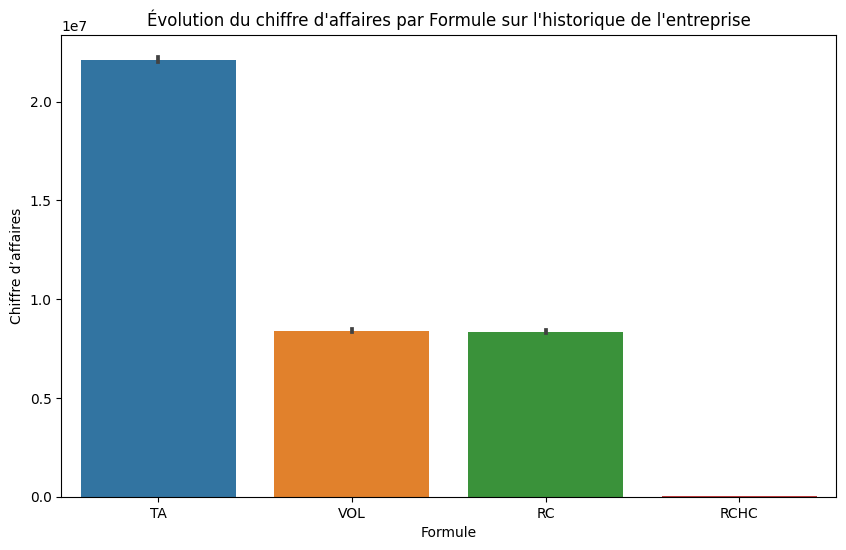

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(x='formule', y='prime_annuelle_ht_mt', data=data_formule, estimator=sum)
plt.title("Évolution du chiffre d'affaires par Formule sur l'historique de l'entreprise")
plt.xlabel('Formule')
plt.ylabel("Chiffre d’affaires")
plt.show()


Il existe quatre formules d'assurance différentes.

La formule de **Responsabilité Civile Hors Circulant (RCHC)** représente une part très modeste dans le chiffre d'affaires de l'entreprise. Ce pourrait être une offre spécialisée destinée à un groupe restreint d'utilisateurs ayant des besoins spécifiques.

Concernant la formule de **Responsabilité Civile (RC)**, qui génère un chiffre d'affaires hors taxes de 8,3 millions, elle correspond à une assurance de base, qui est obligatoire pour tous les véhicules. Sa contribution importante au chiffre d'affaires s'explique par son caractère essentiel pour tous les propriétaires de véhicules.

La formule **Vol**, avec un chiffre d'affaires proche de celui de la RC, indique que la protection contre le vol est largement souscrite par les clients, possiblement en complément de la RC pour offrir une couverture plus exhaustive.

Enfin, la **formule Tous Accidents (CA**) est celle qui génère le plus de profit. Cela suggère qu'elle est très prisée par les consommateurs, probablement en raison de l'étendue de la protection qu'elle offre contre un vaste éventail d'incidents.

### CAHT par Produit

In [37]:
# Variable: produit_cd
produit_fmt = {
    "PAUTH"	    :	"Authentique",
    "PCIRC"	    :	"Circuit",
    "PCOLL"     :   "Collection",
    "PCOURC"    :	"Coursier"	,
    "PCOURM"    :	"Coursier",
    "PCOURCA"   :   "Coursier alimentaire",
    "PCOURMA"   :	"Coursier alimentaire",
    "PEDPM"	    :	"EDPM",
    "PMOTA"     :	"Ma perso",
    "PMPS"      :   "Ma perso",
    "PMVL"      :	"Vert Loisirs",
    "PRVLH"     :	"Vert Loisirs",
    "PRVLN"     :	"Vert Loisirs",
    "PRLOU"     :	"Loueurs",
    "PRLOUC"    :   "Loueurs",
    "PRSPEC"    :   "Risques Spéciaux",
    "PRSPEM"    :   "Risques Spéciaux",
    "PRSTD"     :   "Standard",
    "PRTRT"     :   "Standard",
    "PSTD"      :   "Standard",
    "PRURBS"    :   "Urban Scoot",
    "PURBS"     :   "Urban Scoot",
    "PSCOL"     :   "Scolaire",
    "PVAE"      :	"VAE"
}

In [38]:
data_formule['produit_cd'] = data_formule['produit_cd'].replace(produit_fmt)

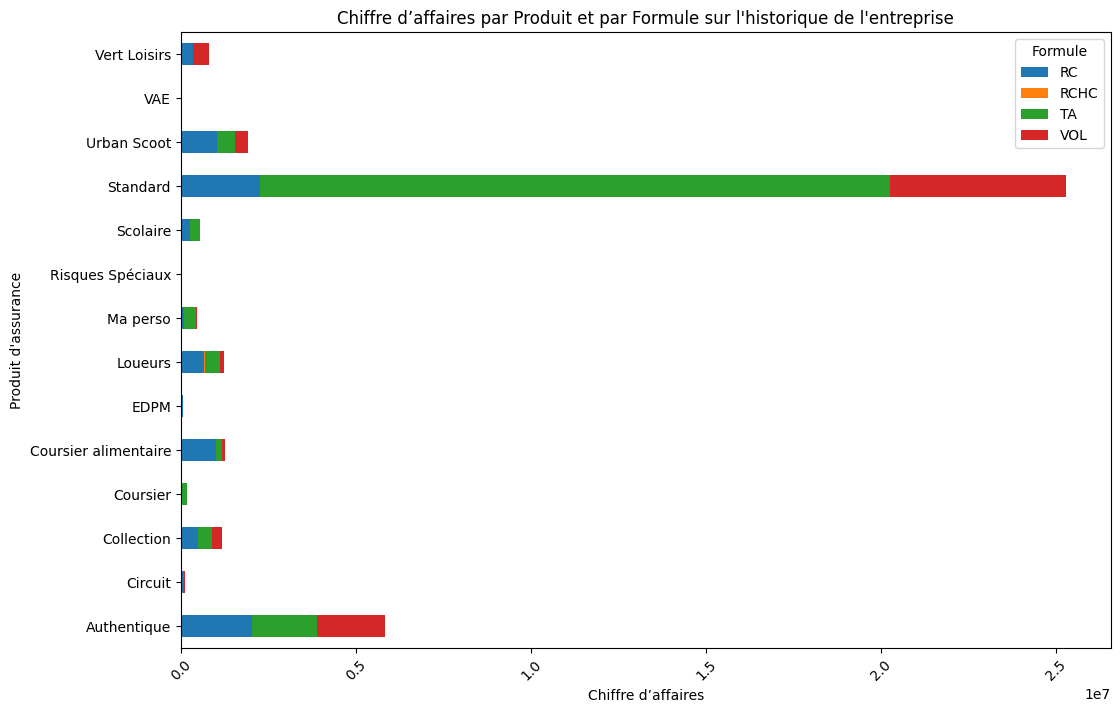

In [39]:
# Sum of prime_annuelle_ht_mt for each combination of produit_cd and formule
grouped_data = data_formule.groupby(['produit_cd', 'formule'])['prime_annuelle_ht_mt'].sum().unstack().fillna(0)

# Plotting
fig, ax = plt.subplots(figsize=(12, 8))
grouped_data.plot(kind='barh', stacked=True, ax=ax)

plt.title("Chiffre d’affaires par Produit et par Formule sur l'historique de l'entreprise")
plt.xlabel("Chiffre d’affaires")
plt.ylabel("Produit d'assurance")
plt.xticks(rotation=45)
plt.legend(title='Formule')
plt.show()


On remarque que parmi les différents produits, deux se distinguent nettement des autres en termes de performance : le produit standard et le produit authentique. Le produit standard, en particulier, affiche une capacité à générer un CAHT remarquable. En analysant plus finement ce produit, on constate que la formule "Tous accidents" est celle qui y est le plus fréquemment associée, ce qui suggère que l'entreprise a rencontré un succès notable avec une offre standard complète.

### CAHT par Acteur de distribution

In [40]:
data_acteur = datafinal.copy()

In [41]:
# Créer un tableau croisé dynamique 'summary_table' avec 'data_formule', en utilisant 'fractionnement_cd' et 'formule' comme index, 'partenaire_cd' comme colonnes, et la somme de 'prime_annuelle_ht_mt' comme valeurs. Inclure le total général ('All').

summary_table = data_acteur.pivot_table(
    index='partenaire_cd', 
    values='prime_annuelle_ht_mt', 
    aggfunc='sum', 
    margins=True
)
summary_table


,prime_annuelle_ht_mt
partenaire_cd,
-1,26240222.58
AGPM,2625664.80
CAA003,315.41
CAA008,708.64
CAA009,2975.08
...,...
MYO001,946.28
MZE001,2536.60
PARTENAIRE,2331.19


In [42]:
# Variable: partenaire_cd
def partenaire_fmt(x):
    if x == '-1': 
        x = 'Vente directe'
        return x
    else: 
        x = 'Partenaire'
        return x
    

In [43]:
data_acteur['partenaire_cd'] = data_acteur['partenaire_cd'].apply(lambda x: partenaire_fmt(x))

In [44]:
summary_table = data_acteur.pivot_table(
    index='partenaire_cd', 
    values='prime_annuelle_ht_mt', 
    aggfunc='count', 
    margins=True
)
summary_table = summary_table.rename(columns={'prime_annuelle_ht_mt': 'Nombre de contrat soucrit'},errors="raise")
summary_table

,Nombre de contrat soucrit
partenaire_cd,
Partenaire,24976
Vente directe,67328
All,92304


In [45]:
summary_table2 = data_acteur.pivot_table(
    index='partenaire_cd', 
    values='prime_annuelle_ht_mt', 
    aggfunc='sum', 
    margins=True
)
summary_table2 = summary_table2.rename(columns={'prime_annuelle_ht_mt': 'CAHT total réalisé'},errors="raise")
summary_table2

,CAHT total réalisé
partenaire_cd,
Partenaire,12683375.18
Vente directe,26240222.58
All,38923597.76


In [46]:
summary_table3 = pd.concat([summary_table,summary_table2], axis=1)
summary_table3

,Nombre de contrat soucrit,CAHT total réalisé
partenaire_cd,,
Partenaire,24976,12683375.18
Vente directe,67328,26240222.58
All,92304,38923597.76



L'analyse comparative entre les méthodes de distribution de contrats montre que les ventes directes surpassent celles réalisées par le biais de partenaires en ce qui concerne le chiffre d'affaires. Toutefois, les contributions des ventes partenaires ne sont pas marginales, ce qui indique que l'entreprise bénéficie d'une stratégie de distribution diversifiée contribuant efficacement à la génération de ses revenus.

In [112]:
data_acteur['formule'] = data_acteur['formule_cd'].str.extract('(\d)').astype(str)
data_acteur['formule'] = data_acteur['formule'].replace(formule_fmt)

In [116]:
pivottable = data_acteur.pivot_table(
    index='partenaire_cd',
    columns='formule',
    values='contrat_id', 
    aggfunc='count', 
    margins=True)
pivottable

formule,RC,RCHC,TA,VOL,All
partenaire_cd,,,,,
Partenaire,10464,201,9053,5258,24976
Vente directe,25477,292,24668,16891,67328
All,35941,493,33721,22149,92304


In [130]:
crosstable = pd.crosstab(data_acteur['partenaire_cd'],data_acteur['formule'])
crosstable

formule,RC,RCHC,TA,VOL
partenaire_cd,,,,
Partenaire,10464,201,9053,5258
Vente directe,25477,292,24668,16891


In [47]:
from statsmodels.graphics.mosaicplot import mosaic
from itertools import product

(<Figure size 640x480 with 3 Axes>,
 {('Partenaire', 'RC'): (0.0, 0.0, 0.269237966865275, 0.41481406308471974),
  ('Partenaire', 'RCHC'): (0.0,
   0.418114393117723,
   0.269237966865275,
   0.007968045363152619),
  ('Partenaire', 'TA'): (0.0,
   0.4293827685138789,
   0.269237966865275,
   0.3588791774757232),
  ('Partenaire', 'VOL'): (0.0,
   0.7915622760226054,
   0.269237966865275,
   0.20843772397739457),
  ('Vente directe', 'RC'): (0.27421309124338444,
   0.0,
   0.7257869087566157,
   0.3746547123818846),
  ('Vente directe', 'RCHC'): (0.27421309124338444,
   0.37795504241488787,
   0.7257869087566157,
   0.004294036818130514),
  ('Vente directe', 'TA'): (0.27421309124338444,
   0.38554940926602166,
   0.7257869087566157,
   0.3627578774987765),
  ('Vente directe', 'VOL'): (0.27421309124338444,
   0.7516076167978015,
   0.7257869087566157,
   0.2483923832021985)})

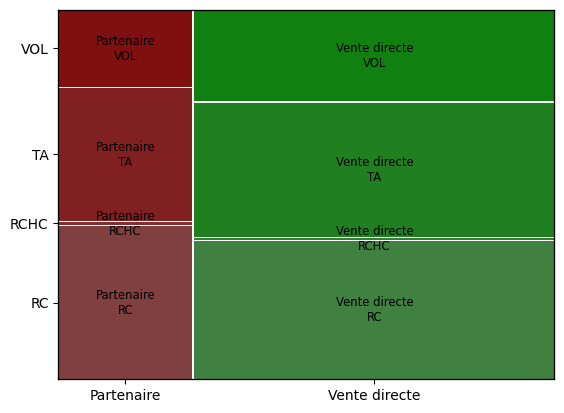

In [138]:
mosaic(crosstable.stack())

<Figure size 1200x600 with 0 Axes>

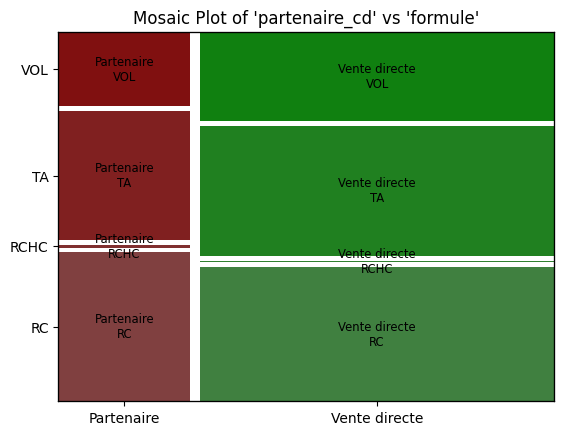

In [136]:
crosstab_example = pd.DataFrame({
    'RC': [10464, 25477],
    'RCHC': [201, 292],
    'TA': [9053, 24668],
    'VOL': [5258, 16891]
}, index=['Partenaire', 'Vente directe'])

mosaic_data = {}
for row in crosstab_example.index:
    for col in crosstab_example.columns:
        mosaic_data[(row, col)] = crosstab_example.loc[row, col]

# Creating the mosaic plot with the correctly formatted data
plt.figure(figsize=(12, 6))
mosaic(mosaic_data, gap=0.02)
plt.title("Mosaic Plot of 'partenaire_cd' vs 'formule'")
plt.show()


### CAHT par Fractionnement

In [48]:
data_frac = datafinal.copy()

In [49]:
# Variable: formule_cd
fractionnement_fmt = {
    'A': "Annuel",
    'M': "Mensuel",
    'S': "Semestriel",
    'T': "Trimestriel"
}

In [50]:
data_frac['fractionnement_cd'] = data_formule['fractionnement_cd'].replace(fractionnement_fmt)

In [51]:
frac_freq = data_frac.groupby(by='fractionnement_cd')['prime_annuelle_ht_mt'].agg('sum').reset_index()
frac_freq

,fractionnement_cd,prime_annuelle_ht_mt
0,Annuel,8874351.97
1,Mensuel,28735171.15
2,Semestriel,928629.70
3,Trimestriel,385444.94


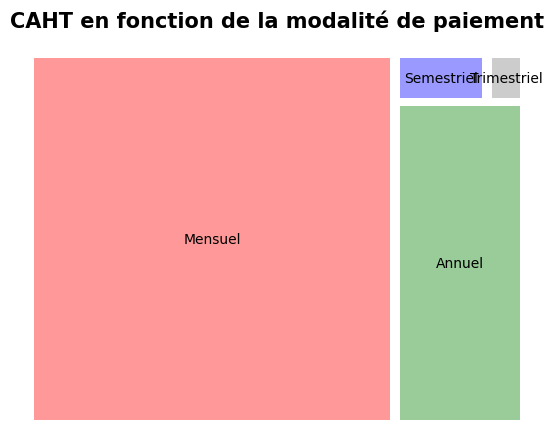

In [52]:
import matplotlib.pyplot as plt
import squarify # (algorithm for treemap)
import pandas as pd
frac_freq = frac_freq.sort_values('prime_annuelle_ht_mt', ascending=False)

# plot it
squarify.plot(sizes=frac_freq['prime_annuelle_ht_mt'], label=frac_freq['fractionnement_cd'], color=["red","green","blue", "grey"], alpha=.4, pad=0.25 )
plt.axis('off')
plt.title('CAHT en fonction de la modalité de paiement', fontweight='bold', fontsize=15, pad=20)
plt.show()

On observe clairement une préférence pour le paiement mensuel, probablement en raison de la commodité que représente la répartition des dépenses sur l'année. De leur côté, les paiements annuels sont également prisés, certainement à cause des éventuelles remises accordées pour un règlement en une seule fois. Cette dynamique rend les options de paiement semestriel et trimestriel moins attrayantes pour les consommateurs.

### Sexe

In [53]:
sexe_freq = datafinal['societaire_sexe_cd'].value_counts(normalize=True).reset_index()
sexe_freq.columns = ['societaire_sexe_cd', 'percent']
sexe_freq['percent'] *= 100

# Mapping codes
societaire_sexe_fmt = {
    1: "Femme",
    2: "Homme",
    -1: "Non renseigné"
}
sexe_freq['sexe'] = sexe_freq['societaire_sexe_cd'].replace(societaire_sexe_fmt)

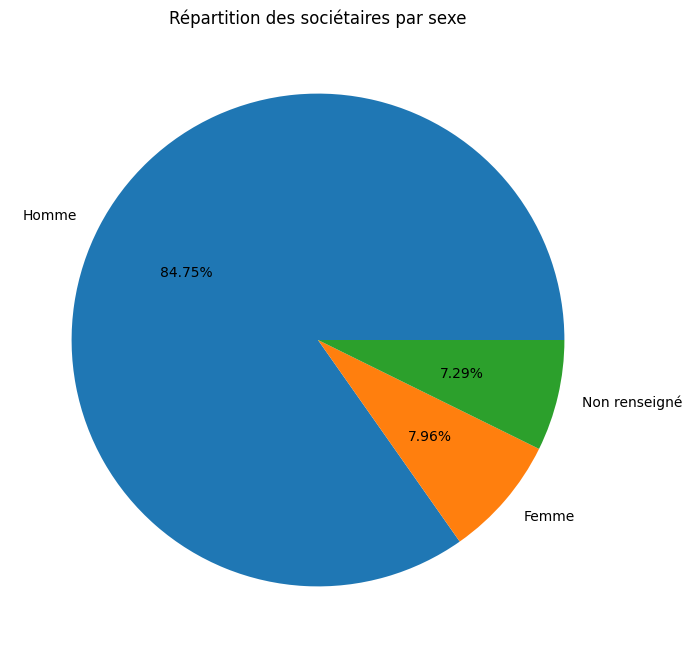

In [54]:
# Pie chart
plt.figure(figsize=(8, 8))
plt.pie(sexe_freq['percent'], labels=sexe_freq['sexe'], autopct='%1.2f%%', startangle=0)
plt.title("Répartition des sociétaires par sexe")
plt.show()


Il est évident que dans la base de sociétaires, les conducteurs de motos à deux roues sont majoritairement des hommes, représentant 84,75% de cette population. Par contre, les femmes ne constituent que 8% de cette base. 

Ces chiffres pourraient refléter une tendance générale dans le secteur des motos à deux roues, ou bien mettre en évidence un intérêt plus marqué des hommes pour les motos comparativement aux femmes.

### Socio-pro

In [55]:
data_socio = datafinal.copy()
data_socio['societaire_csp_cd'] = data_socio['societaire_csp_cd'].fillna(-1)

socio_freq = data_socio['societaire_csp_cd'].value_counts(normalize=True).reset_index()
socio_freq.columns = ['societaire_csp_cd', 'percent']

In [56]:
# Replace with formats
societaire_csp_fmt = {
    -1 		: 	"Non spécifié",
    11		:	"Agriculteurs exploitants",
    12		:	"Artisans commerçants",
    13		:	"Chef d'entreprises de plus de 10 salariés",
    14		:	"Professions libérales et artistiques",
    20		:	"Cadres",
    30		:	"Professions intermédiaires",
    40		:	"Employés",
    50		:	"Ouvriers",
    61		:	"Retraités",
    62		:	"Etudiants",
    63		:	"En recherche d'emploi",
    64	    :	"Sans activité professionnelle",
    65      :   "Sans activité professionnelle",
    70		:	"Personnes morales",
    80		:	"Non connu"
}

socio_freq['pro'] = socio_freq['societaire_csp_cd'].replace(societaire_csp_fmt)
socio_freq['percent'] *= 100


In [57]:
socio_freq

,societaire_csp_cd,percent,pro
0,-1,45.338230,Non spécifié
1,40,27.525351,Employés
2,20,5.994323,Cadres
3,50,4.541515,Ouvriers
4,12,4.239253,Artisans commerçants
5,62,3.141792,Etudiants
6,30,3.011787,Professions intermédiaires
7,61,1.947911,Retraités
8,14,1.843907,Professions libérales et artistiques
9,64,1.005374,Sans activité professionnelle


In [58]:
#Créer la colonne 'pro2' dans le DataFrame 'socio_freq'. Pour chaque ligne, si la valeur de 'percent' est inférieure à 4%, 'pro2' est défini à 'Autres'. Sinon, 'pro2' reprend la valeur de la colonne 'pro' de la même ligne.

socio_freq['pro2'] = socio_freq.apply(lambda row: 'Autres' if row['percent'] < 4 else row['pro'], axis=1)

In [59]:
socio_freq['pro2']

0             Non spécifié
1                 Employés
2                   Cadres
3                 Ouvriers
4     Artisans commerçants
5                   Autres
6                   Autres
7                   Autres
8                   Autres
9                   Autres
10                  Autres
11                  Autres
12                  Autres
13                  Autres
Name: pro2, dtype: object

In [60]:
socio_freq2 = socio_freq.groupby('pro2')['percent'].sum().reset_index()
socio_freq2

,pro2,percent
0,Artisans commerçants,4.239253
1,Autres,12.361328
2,Cadres,5.994323
3,Employés,27.525351
4,Non spécifié,45.338230
5,Ouvriers,4.541515


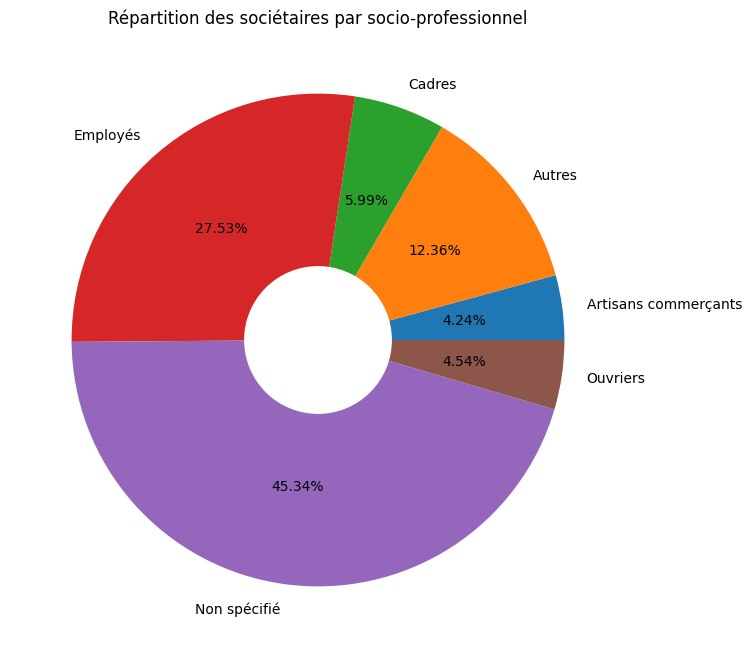

In [61]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 8))
plt.pie(socio_freq2['percent'], labels=socio_freq2['pro2'], autopct='%1.2f%%', startangle=0)
plt.title("Répartition des sociétaires par socio-professionnel")

centre_circle = plt.Circle((0,0),0.30,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.show()


Une part conséquente des individus, approximativement 45%, n'a pas indiqué leur catégorie socio-professionnelle. Ce phénomène pourrait résulter d'une décision personnelle, de l'absence de données ou de restrictions dans la collecte de ces informations. Il serait donc judicieux d'améliorer le processus de collecte de données pour obtenir une meilleure compréhension du marché.

Parmi les catégories identifiées, celle des employés se distingue comme étant la plus représentée. Cela suggère que les produits ou services de l'entreprise sont peut-être particulièrement adaptés aux besoins de cette catégorie socio-professionnelle.

Quant aux autres catégories socio-professionnelles, bien que moins représentatives en termes de proportion, elles illustrent néanmoins la diversité des sociétaires de l'entreprise.

### Territoire

In [62]:

territoire_freq = datafinal['societaire_drom_pom_com_in'].value_counts(normalize=True).reset_index()
territoire_freq.columns = ['societaire_drom_pom_com_in', 'percent']

territoire_freq['percent'] *= 100

In [63]:
societaire_drom_pom_com_fmt = {
    "A": "Métropole",
    "C": "Outre-Mer",
    "D": "Outre-Mer",
    "M": "Outre-Mer",
    "P": "Outre-Mer",
}

territoire_freq['territory'] = territoire_freq['societaire_drom_pom_com_in'].replace(societaire_drom_pom_com_fmt)
territoire_freq

,societaire_drom_pom_com_in,percent,territory
0,A,85.554941,Métropole
1,D,12.235916,Outre-Mer
2,P,2.150608,Outre-Mer
3,M,0.048779,Outre-Mer
4,C,0.009756,Outre-Mer


In [64]:
territoire_freq2 = territoire_freq.groupby('territory')['percent'].sum().reset_index()
territoire_freq2

,territory,percent
0,Métropole,85.554941
1,Outre-Mer,14.445059


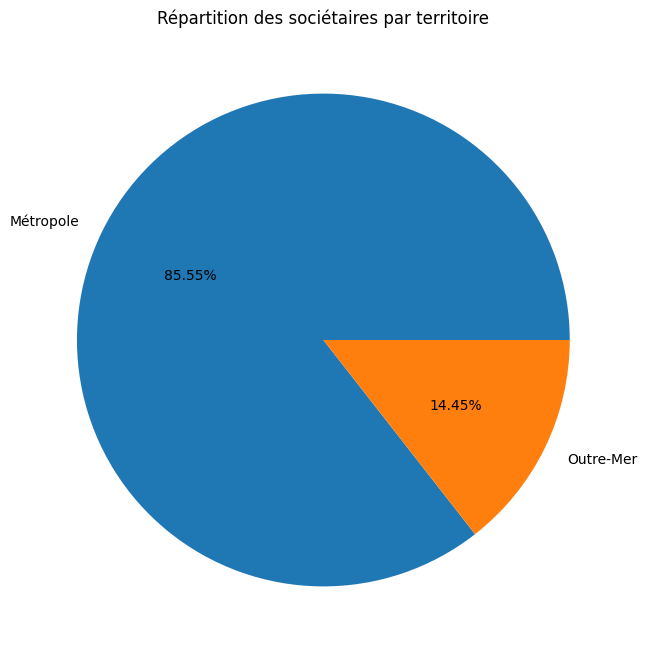

In [65]:
import matplotlib.pyplot as plt

# Creating the pie chart
plt.figure(figsize=(8, 8))
plt.pie(territoire_freq2['percent'], labels=territoire_freq2['territory'], autopct='%1.2f%%', startangle=0)
plt.title("Répartition des sociétaires par territoire")
plt.show()



La distribution géographique des sociétaires montre une prédominance significative en Métropole, qui représente 85,55% du total. Cette majorité indique clairement que la Métropole constitue le marché principal de l'entreprise.

Les sociétaires situés en Outre-Mer, bien que représentant une part moins importante avec 14,45% du total, offrent potentiellement des opportunités de croissance.

### Lieu d'habitation (département)

In [66]:
data_dpt = datafinal.copy()
data_dpt['code_postal_cd'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 92304 entries, 0 to 92303
Series name: code_postal_cd
Non-Null Count  Dtype 
--------------  ----- 
92271 non-null  object
dtypes: object(1)
memory usage: 721.3+ KB


In [67]:
data_dpt['code_postal_cd'].str.findall('[a-zA-Z]').value_counts()

code_postal_cd
[]        92268
[S, W]        2
[N, H]        1
Name: count, dtype: int64

In [68]:
data_dpt['code_postal_cd'].str.startswith('SW').value_counts()

code_postal_cd
False    92269
True         2
Name: count, dtype: int64

In [69]:
data_dpt['code_postal_cd'].str.startswith('NH').value_counts()

code_postal_cd
False    92270
True         1
Name: count, dtype: int64

In [70]:
data_dpt['code_postal_cd'].str.startswith('00').value_counts()

code_postal_cd
False    92269
True         2
Name: count, dtype: int64

In [71]:
# Variable: département
dpt_fmt = {
'01'	:	"Ain",
'02'	:	"Aisne",
'03'	:	"Allier",
'04'	:	"Alpes-de-Haute-Provence",
'05'	:	"Hautes-Alpes",
'06'	:	"Alpes-Maritimes",
'07'	:	"Ardèche",
'08'	:	"Ardennes",
'09'	:	"Ariège",
'10'	:	"Aube",
'11'	:	"Aude",
'12'	:	"Aveyron",
'13'	:	"Bouches-du-Rhône",
'14'	:	"Calvados",
'15'	:	"Cantal",
'16'	:	"Charente",
'17'	:	"Charente-Maritime",
'18'	:	"Cher",
'19'	:	"Corrèze",
'20'    :   "Corse" ,
'2A'	:	"Corse-du-Sud",
'2B'	:	"Haute-Corse",
'21'	:	"Côte-d'Or",
'22'	:	"Côtes d'Armor",
'23'	:	"Creuse",
'24'	:	"Dordogne",
'25'	:	"Doubs",
'26'	:	"Drôme",
'27'	:	"Eure",
'28'	:	"Eure-et-Loir",
'29'	:	"Finistère",
'30'	:	"Gard",
'31'	:	"Haute-Garonne",
'32'	:	"Gers",
'33'	:	"Gironde",
'34'	:	"Hérault",
'35'	:	"Ille-et-Vilaine",
'36'	:	"Indre",
'37'	:	"Indre-et-Loire",
'38'	:	"Isère",
'39'	:	"Jura",
'40'	:	"Landes",
'41'	:	"Loir-et-Cher",
'42'	:	"Loire",
'43'	:	"Haute-Loire",
'44'	:	"Loire-Atlantique",
'45'	:	"Loiret",
'46'	:	"Lot",
'47'	:	"Lot-et-Garonne",
'48'	:	"Lozère",
'49'	:	"Maine-et-Loire",
'50'	:	"Manche",
'51'	:	"Marne",
'52'	:	"Haute-Marne",
'53'	:	"Mayenne",
'54'	:	"Meurthe-et-Moselle",
'55'	:	"Meuse",
'56'	:	"Morbihan",
'57'	:	"Moselle",
'58'	:	"Nièvre",
'59'	:	"Nord",
'60'	:	"Oise",
'61'	:	"Orne",
'62'	:	"Pas-de-Calais",
'63'	:	"Puy-de-Dôme",
'64'	:	"Pyrénées-Atlantiques",
'65'	:	"Hautes-Pyrénées",
'66'	:	"Pyrénées-Orientales",
'67'	:	"Bas-Rhin",
'68'	:	"Haut-Rhin",
'69'	:	"Rhône",
'70'	:	"Haute-Saône",
'71'	:	"Saône-et-Loire",
'72'	:	"Sarthe",
'73'	:	"Savoie",
'74'	:	"Haute-Savoie",
'75'	:	"Paris",
'76'	:	"Seine-Maritime",
'77'	:	"Seine-et-Marne",
'78'	:	"Yvelines",
'79'	:	"Deux-Sèvres",
'80'	:	"Somme",
'81'	:	"Tarn",
'82'	:	"Tarn-et-Garonne",
'83'	:	"Var",
'84'	:	"Vaucluse",
'85'	:	"Vendée",
'86'	:	"Vienne",
'87'	:	"Haute-Vienne",
'88'	:	"Vosges",
'89'	:	"Yonne",
'90'	:	"Territoire-de-Belfort",
'91'	:	"Essonne",
'92'	:	"Hauts-de-Seine",
'93'	:	"Seine-Saint-Denis",
'94'	:	"Val-de-Marne",
'95'	:	"Val-D'Oise",
'97'    : 	"Outre-mer",
'98'    : 	"Outre-mer",
'971'	:	"Guadeloupe",
'972'	:	"Martinique",
'973'	:	"Guyane",
'974'	:	"La Réunion",
'976'	:	"Mayotte",
'00'    : 'Valeur Manquante', 
''      : 'Valeur non Saisie', 
'NH'    : 'Valeur Invalide', 
'SW'    : 'Valeur Invalide'
}

In [72]:
# Convertit d'abord 'code_postal_cd' en chaîne de caractères, complète par des zéros à gauche pour obtenir une longueur de 5 caractères, puis extrait les deux premiers caractères pour former la colonne 'dpt'.
data_dpt['dpt'] = data_dpt['code_postal_cd'].astype(str).str.zfill(5).str[:2]
data_dpt['dpt'] = data_dpt['dpt'].replace(dpt_fmt)


In [73]:
dpt_freq = data_dpt['dpt'].value_counts(normalize=True).reset_index()
dpt_freq.columns = ['dpt', 'percent']
dpt_freq['cum_pct'] = dpt_freq['percent'].cumsum()
dpt_freq['percent'] *= 100
dpt_freq['cum_pct'] *= 100

In [74]:
dpt_freq2 = data_dpt['dpt'].value_counts().reset_index()
dpt_freq3 = pd.concat([dpt_freq,dpt_freq2['count']], axis=1)
dpt_freq3

,dpt,percent,cum_pct,count
0,Outre-mer,14.451161,14.451161,13339
1,Bouches-du-Rhône,4.891446,19.342607,4515
2,Gironde,3.304299,22.646906,3050
3,Alpes-Maritimes,3.277214,25.924120,3025
4,Rhône,3.067039,28.991160,2831
...,...,...,...,...
93,Lozère,0.109421,99.802825,101
94,Creuse,0.091004,99.893829,84
95,Territoire-de-Belfort,0.065003,99.958832,60
96,Valeur Manquante,0.037918,99.996750,35


In [75]:
choices = ['Valeur Invalide', 'Valeur Manquante', 'Valeur non Saisie']
dpt_freq3 = dpt_freq3[~dpt_freq3['dpt'].isin(choices)]
dpt_freq3

,dpt,percent,cum_pct,count
0,Outre-mer,14.451161,14.451161,13339
1,Bouches-du-Rhône,4.891446,19.342607,4515
2,Gironde,3.304299,22.646906,3050
3,Alpes-Maritimes,3.277214,25.924120,3025
4,Rhône,3.067039,28.991160,2831
...,...,...,...,...
91,Meuse,0.143006,99.565566,132
92,Haute-Marne,0.127838,99.693404,118
93,Lozère,0.109421,99.802825,101
94,Creuse,0.091004,99.893829,84


In [76]:
top_5_dpt = dpt_freq3.sort_values(by='percent', ascending=False).head(5)
top_5_dpt

,dpt,percent,cum_pct,count
0,Outre-mer,14.451161,14.451161,13339
1,Bouches-du-Rhône,4.891446,19.342607,4515
2,Gironde,3.304299,22.646906,3050
3,Alpes-Maritimes,3.277214,25.924120,3025
4,Rhône,3.067039,28.991160,2831


In [77]:
dpt_freq4 = data_dpt['dpt'].value_counts(normalize=True, ascending=True).reset_index()
dpt_freq4.columns = ['dpt', 'percent']
dpt_freq4['cum_pct'] = dpt_freq4['percent'].cumsum()
dpt_freq4['percent'] *= 100
dpt_freq4['cum_pct'] *= 100
dpt_freq4

,dpt,percent,cum_pct
0,Valeur Invalide,0.003250,0.003250
1,Valeur Manquante,0.037918,0.041168
2,Territoire-de-Belfort,0.065003,0.106171
3,Creuse,0.091004,0.197175
4,Lozère,0.109421,0.306596
...,...,...,...
93,Rhône,3.067039,74.075880
94,Alpes-Maritimes,3.277214,77.353094
95,Gironde,3.304299,80.657393
96,Bouches-du-Rhône,4.891446,85.548839


In [78]:
dpt_freq5 = data_dpt['dpt'].value_counts(ascending=True).reset_index()
dpt_freq6 = pd.concat([dpt_freq4,dpt_freq5['count']], axis=1)
dpt_freq6

,dpt,percent,cum_pct,count
0,Valeur Invalide,0.003250,0.003250,3
1,Valeur Manquante,0.037918,0.041168,35
2,Territoire-de-Belfort,0.065003,0.106171,60
3,Creuse,0.091004,0.197175,84
4,Lozère,0.109421,0.306596,101
...,...,...,...,...
93,Rhône,3.067039,74.075880,2831
94,Alpes-Maritimes,3.277214,77.353094,3025
95,Gironde,3.304299,80.657393,3050
96,Bouches-du-Rhône,4.891446,85.548839,4515


In [79]:
choices = ['Valeur Invalide', 'Valeur Manquante', 'Valeur non Saisie']
dpt_freq6 = dpt_freq6[~dpt_freq6['dpt'].isin(choices)]
dpt_freq6

,dpt,percent,cum_pct,count
2,Territoire-de-Belfort,0.065003,0.106171,60
3,Creuse,0.091004,0.197175,84
4,Lozère,0.109421,0.306596,101
5,Haute-Marne,0.127838,0.434434,118
6,Meuse,0.143006,0.577440,132
...,...,...,...,...
93,Rhône,3.067039,74.075880,2831
94,Alpes-Maritimes,3.277214,77.353094,3025
95,Gironde,3.304299,80.657393,3050
96,Bouches-du-Rhône,4.891446,85.548839,4515


In [80]:
bottom_5_dpt = dpt_freq6.sort_values(by='percent').head(5)
bottom_5_dpt

,dpt,percent,cum_pct,count
2,Territoire-de-Belfort,0.065003,0.106171,60
3,Creuse,0.091004,0.197175,84
4,Lozère,0.109421,0.306596,101
5,Haute-Marne,0.127838,0.434434,118
6,Meuse,0.143006,0.577440,132


In [140]:
print("Top 5 des départements les plus populaires:")
print(top_5_dpt)

print("\nBottom 5 des départements les moins populaires:")
print(bottom_5_dpt)

Top 5 des départements les plus populaires:
                dpt    percent    cum_pct  count
0         Outre-mer  14.451161  14.451161  13339
1  Bouches-du-Rhône   4.891446  19.342607   4515
2           Gironde   3.304299  22.646906   3050
3   Alpes-Maritimes   3.277214  25.924120   3025
4             Rhône   3.067039  28.991160   2831

Bottom 5 des départements les moins populaires:
                     dpt   percent   cum_pct  count
2  Territoire-de-Belfort  0.065003  0.106171     60
3                 Creuse  0.091004  0.197175     84
4                 Lozère  0.109421  0.306596    101
5            Haute-Marne  0.127838  0.434434    118
6                  Meuse  0.143006  0.577440    132


Afin de mieux comprendre la clientèle de l'entreprise, une étude portant sur l'aspect géographique s'avère utile. Pour une analyse géographique approfondie, le document ci-joint met en évidence les cinq départements ayant la plus grande part de sociétaires. Il ressort de cette étude que les départements d'Outre-mer, des Bouches-du-Rhône, de la Gironde, des Alpes-Maritimes et du Rhône regroupent ensemble environ 30% de la clientèle, avec une part significative de 14,45% pour l'Outre-mer seul.

En revanche, les départements comptant le moins de sociétaires, à savoir le Territoire-de-Belfort, la Creuse, la Lozère, la Haute-Marne et la Meuse, représentent ensemble une part minime, ne constituant que 0,54% de l'ensemble de la clientèle.

### Bureau de gestion

In [81]:
# Variable: bureau_gestion_cd
bureau_gestion_fmt = {
    -1: "Non renseigné",
    9: "Bordeaux",
    11: "Saint Jean de Védas",
    13: "Saint Etienne",
    17: "Cannes",
    23: "Strasbourg",
    27: "Rouen",
    30: "Toulon",
    33: "Marseille",
    36: "Nimes",
    39: "Grenoble",
    41: "Nice",
    46: "Rennes",
    51: "Lyon",
    53: "Dardilly",
    62: "Clermont Ferrand",
    64: "Annecy",
    66: "Nantes",
    68: "Toulouse",
    74: "Lille",
    84: "Tours",
    90: "Paris Haussmann",
    92: "Paris Lyon",
    99: "Montpellier",
    103: "Metz",
    104: "Bayonne",
    105: "Limoges",
    107: "Aix en Provence",
    111: "Caen",
    112: "Valence",
    113: "Poitiers",
    117: "Spécial",
    118: "Agen",
    122: "Orléans",
    131: "Dijon",
    136: "Ile de la Réunion",
    138: "Amiens",
    139: "Brest",
    147: "Mont de Marsan",
    151: "Nancy",
    153: "Guadeloupe",
    154: "Martinique",
    155: "Guyane",
    156: "Polynésie Française",
    157: "Nouvelle Calédonie",
    159: "Paris Maine",
    165: "Marseille 2",
    830: "Outre Mer",
    980: "Outre Mer"
}

In [82]:
data_bureau = datafinal.copy()
data_bureau['bureau_gestion_cd'] = data_bureau['bureau_gestion_cd'].replace(bureau_gestion_fmt)

In [83]:
bureau_freq = data_bureau['bureau_gestion_cd'].value_counts(normalize=True).reset_index()
bureau_freq.columns = ['bureau_gestion_cd', 'percent']
bureau_freq['cum_pct'] = bureau_freq['percent'].cumsum()
bureau_freq['percent'] *= 100
bureau_freq['cum_pct'] *= 100
bureau_freq = bureau_freq[bureau_freq['bureau_gestion_cd'] != -1].copy()
bureau_freq

,bureau_gestion_cd,percent,cum_pct
0,Paris Lyon,9.920480,9.920480
1,Spécial,7.741810,17.662290
2,Outre Mer,6.438508,24.100797
3,Bordeaux,4.283671,28.384469
4,Saint Jean de Védas,4.110331,32.494800
5,Marseille,3.852487,36.347287
6,Ile de la Réunion,3.643396,39.990683
7,Toulouse,3.497140,43.487823
8,Lyon,2.927284,46.415107
9,Rouen,2.736609,49.151716


In [84]:
bureau_freq2 = pd.merge(bureau_freq,data_bureau['bureau_gestion_cd'].value_counts().reset_index(), on='bureau_gestion_cd', how='inner')
bureau_freq2

,bureau_gestion_cd,percent,cum_pct,count
0,Paris Lyon,9.920480,9.920480,9157
1,Spécial,7.741810,17.662290,7146
2,Outre Mer,6.438508,24.100797,5943
3,Bordeaux,4.283671,28.384469,3954
4,Saint Jean de Védas,4.110331,32.494800,3794
5,Marseille,3.852487,36.347287,3556
6,Ile de la Réunion,3.643396,39.990683,3363
7,Toulouse,3.497140,43.487823,3228
8,Lyon,2.927284,46.415107,2702
9,Rouen,2.736609,49.151716,2526


In [85]:
top_10_bureaux = bureau_freq2.sort_values(by='percent', ascending=False).head(10)
top_10_bureaux

,bureau_gestion_cd,percent,cum_pct,count
0,Paris Lyon,9.920480,9.920480,9157
1,Spécial,7.741810,17.662290,7146
2,Outre Mer,6.438508,24.100797,5943
3,Bordeaux,4.283671,28.384469,3954
4,Saint Jean de Védas,4.110331,32.494800,3794
5,Marseille,3.852487,36.347287,3556
6,Ile de la Réunion,3.643396,39.990683,3363
7,Toulouse,3.497140,43.487823,3228
8,Lyon,2.927284,46.415107,2702
9,Rouen,2.736609,49.151716,2526


In [86]:
bureau_freq3 = data_bureau['bureau_gestion_cd'].value_counts(normalize=True, ascending=True).reset_index()
bureau_freq3.columns = ['bureau_gestion_cd', 'percent']
bureau_freq3['cum_pct'] = bureau_freq3['percent'].cumsum()
bureau_freq3['percent'] *= 100
bureau_freq3['cum_pct'] *= 100
bureau_freq3 = bureau_freq3[bureau_freq3['bureau_gestion_cd'] != -1].copy()

In [87]:
bureau_freq4 = pd.merge(bureau_freq3,data_bureau['bureau_gestion_cd'].value_counts(ascending=True).reset_index(), on='bureau_gestion_cd', how='inner')
bureau_freq4

,bureau_gestion_cd,percent,cum_pct,count
0,Nancy,0.001083,0.001083,1
1,Paris Haussmann,0.001083,0.002167,1
2,Non renseigné,0.003250,0.005417,3
3,Montpellier,0.023834,0.029251,22
4,Guadeloupe,0.291428,0.320679,269
5,Martinique,0.358598,0.679277,331
6,Guyane,0.500520,1.179797,462
7,Agen,0.767031,1.946828,708
8,Polynésie Française,0.858034,2.804862,792
9,Poitiers,0.907870,3.712732,838


In [88]:
bottom_10_bureaux = bureau_freq4.sort_values(by='percent', ascending=True).head(10)
bottom_10_bureaux

,bureau_gestion_cd,percent,cum_pct,count
0,Nancy,0.001083,0.001083,1
1,Paris Haussmann,0.001083,0.002167,1
2,Non renseigné,0.003250,0.005417,3
3,Montpellier,0.023834,0.029251,22
4,Guadeloupe,0.291428,0.320679,269
5,Martinique,0.358598,0.679277,331
6,Guyane,0.500520,1.179797,462
7,Agen,0.767031,1.946828,708
8,Polynésie Française,0.858034,2.804862,792
9,Poitiers,0.907870,3.712732,838


In [139]:
print("Top 10 Performing Bureaux:")
print(top_10_bureaux)

print("\nBottom 10 Performing Bureaux:")
print(bottom_10_bureaux)

Top 10 Performing Bureaux:
     bureau_gestion_cd   percent    cum_pct  count
0           Paris Lyon  9.920480   9.920480   9157
1              Spécial  7.741810  17.662290   7146
2            Outre Mer  6.438508  24.100797   5943
3             Bordeaux  4.283671  28.384469   3954
4  Saint Jean de Védas  4.110331  32.494800   3794
5            Marseille  3.852487  36.347287   3556
6    Ile de la Réunion  3.643396  39.990683   3363
7             Toulouse  3.497140  43.487823   3228
8                 Lyon  2.927284  46.415107   2702
9                Rouen  2.736609  49.151716   2526

Bottom 10 Performing Bureaux:
     bureau_gestion_cd   percent   cum_pct  count
0                Nancy  0.001083  0.001083      1
1      Paris Haussmann  0.001083  0.002167      1
2        Non renseigné  0.003250  0.005417      3
3          Montpellier  0.023834  0.029251     22
4           Guadeloupe  0.291428  0.320679    269
5           Martinique  0.358598  0.679277    331
6               Guyane  0.50052

L'analyse des bureaux de gestion met en lumière une disparité notable en termes de performance. Les 10 bureaux les plus performants génèrent approximativement 21 millions de CAHT, ce qui constitue plus de la moitié du CAHT total réalisé par l'entreprise. Cette haute performance pourrait s'expliquer par le fait que ces bureaux sont situés dans des grandes villes ou des zones spécifiques où l'activité économique est plus dense, ou encore dans des centres économiques majeurs.

À l'inverse, les 10 bureaux les moins performants ne contribuent qu'environ à 4% du CAHT de l'entreprise. Cette faible performance pourrait être liée à leur emplacement dans des régions moins dynamiques économiquement, ou à une moindre concentration d'activités propices à générer un chiffre d'affaires élevé.

### Age

In [90]:
from datetime import datetime
data_age = datafinal.copy()
current_year = datetime.now().year
data_age['age'] = current_year - data_age['societaire_naissance_dt'].dt.year
data_age['age'] = data_age['age'].fillna(-1).astype(int)

In [91]:
age_freq = data_age['age'].value_counts().sort_index().reset_index()
age_freq.columns = ['age', 'frequency']
age_freq

,age,frequency
0,-1,6726
1,18,8
2,19,209
3,20,690
4,21,1138
...,...,...
70,87,2
71,88,3
72,89,2
73,90,1


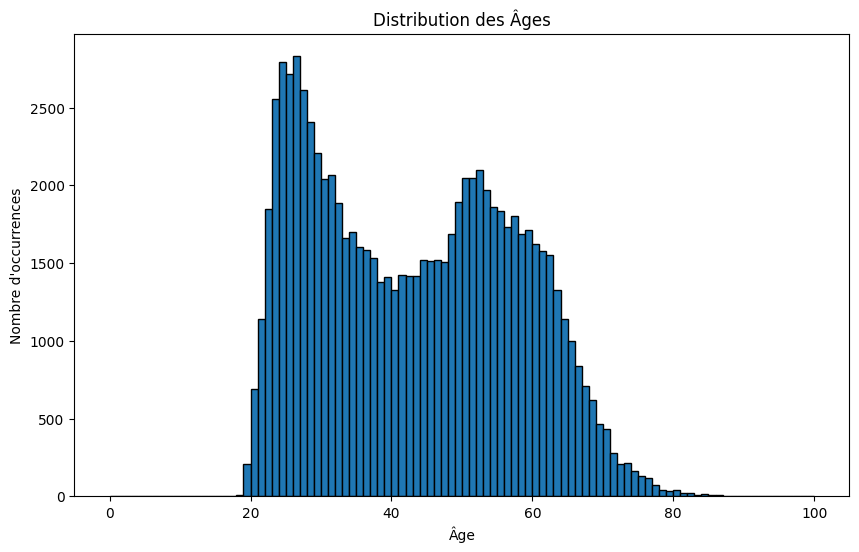

In [92]:
import matplotlib.pyplot as plt

data_age_filtered = data_age[data_age['age'] != -1]

plt.figure(figsize=(10, 6))
plt.hist(data_age_filtered['age'], bins=range(0, 101), edgecolor='black')
plt.title("Distribution des Âges")
plt.xlabel("Âge")
plt.ylabel("Nombre d'occurrences")
plt.show()

L'analyse de l'histogramme de distribution des âges révèle deux pics notables. Le premier pic, qui est également le plus élevé, correspond à des clients jeunes, âgés d'environ 24 à 26 ans. Cette observation souligne l'importance des clients de moins de 30 ans dans la base de clientèle de l'entreprise. Le second pic représente des individus d'un âge moyen.

Ces observations permettent de distinguer trois tranches d'âge principales au sein de la clientèle de l'entreprise : les moins de 30 ans, les 30-45 ans, et les plus de 45 ans.

In [93]:
def categorize_age(age):
    if age == -1:
        return 'Non renseigné'
    elif 18 <= age <= 29:
        return 'Moins de 30 ans'
    elif 30 <= age <= 45:
        return 'Entre 30 ans et 45 ans'
    else:
        return 'Plus de 45 ans'

In [94]:
# Variable: canal_souscription_cd
canal_souscription_fmt = {
    "-1": "Non renseigné",
    "BU":"Bureau",
    "CP":"Internet",
    "CR":"Internet",
    "CT":"Internet",
    "IN":"Internet",
    "WW":"Internet",
    "OUT":"Salon",
    "SA":"Salon",
    "TE":"Téléphone"
}

In [95]:
data_age['age_category'] = data_age['age'].apply(categorize_age)
data_age['canal_souscription_cd'] = data_age['canal_souscription_cd'].replace(canal_souscription_fmt)
age_category_freq = data_age['age_category'].value_counts(normalize=True) * 100
age_category_freq

age_category
Plus de 45 ans            41.239816
Entre 30 ans et 45 ans    27.619605
Moins de 30 ans           23.853787
Non renseigné              7.286791
Name: proportion, dtype: float64

Dans cette analyse, on constate que la tranche d'âge des moins de 30 ans, bien qu'elle représente seulement environ 24% du nombre total de clients, contribue à hauteur d'un tiers au CAHT (32,49%) de l'entreprise. Par contre, les autres tranches d'âge, malgré un nombre de clients supérieur à celui des moins de 30 ans, ne génèrent pas un CAHT aussi élevé que celui des jeunes adultes.

Cette situation peut s'expliquer par le fait que les jeunes clients sont souvent de nouveaux conducteurs, manquant d'expérience. En conséquence, ils ont tendance à opter pour des formules d'assurance plus complètes afin de se couvrir totalement contre les risques et de pallier leur manque d'expérience de conduite.

Ainsi, la question qui se pose est de savoir comment l'entreprise peut attirer davantage de clients dans la tranche d'âge des moins de 30 ans?.

In [96]:
young_adults = data_age[data_age['age'] < 30]

channel_dist_freq = young_adults.groupby(['canal_souscription_cd', 'contrat_distrib_lb']).size().unstack(fill_value=0)
channel_dist_freq.drop(['Non renseigné'], axis=0, inplace=True)
channel_dist_freq

contrat_distrib_lb,Courtage,En direct,Partenariat
canal_souscription_cd,,,
Bureau,1850,1392,60
Internet,3638,1748,8
Salon,39,183,0
Téléphone,3026,16739,26


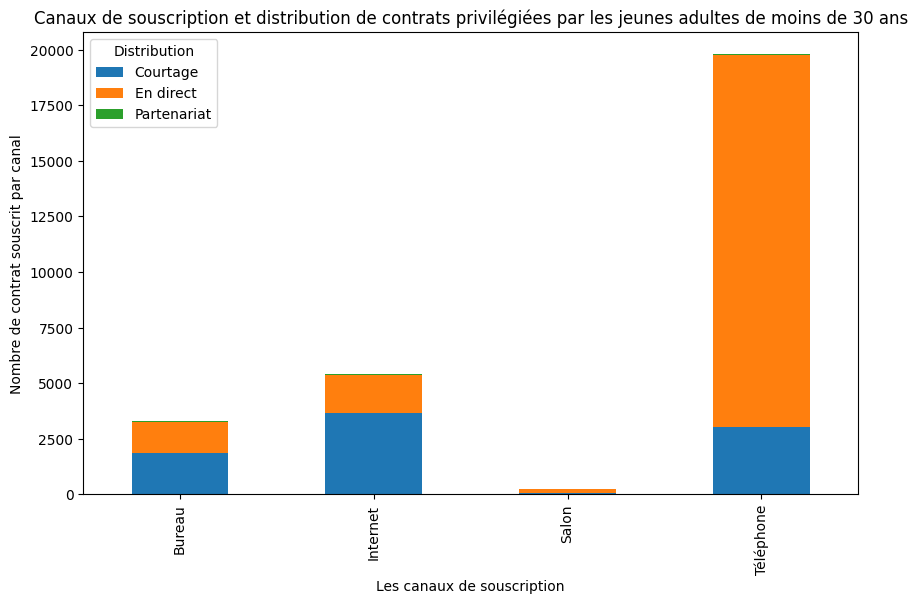

In [97]:
channel_dist_freq.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title("Canaux de souscription et distribution de contrats privilégiées par les jeunes adultes de moins de 30 ans")
plt.xlabel("Les canaux de souscription")
plt.ylabel("Nombre de contrat souscrit par canal")
plt.legend(title='Distribution')
plt.show()

Pour répondre à cette question, je me pencherais sur l'analyse des canaux de souscription et les méthodes de distribution des contrats privilégiées par les jeunes adultes.

Il est intéressant de noter un paradoxe : malgré la tendance à la digitalisation, les canaux téléphonique et bureautique demeurent les plus populaires parmi les jeunes. Cela pourrait suggérer que les jeunes clients privilégient les interactions directes ou recherchent des conseils pratiques lors de la souscription.

En outre, le canal téléphonique est nettement le plus utilisé, probablement en raison de sa commodité et de sa rapidité, permettant de souscrire depuis n'importe quel endroit.

D'autre part, la distribution via des partenariats semble moins efficace auprès des clients de moins de 30 ans, qui souscrivent souvent leur premier contrat. Cela explique pourquoi la distribution directe est le moyen le plus efficace pour cette tranche d'âge.

### Type de vocation

In [98]:
# Variable: vocation_cd
vocation_fmt = {
'B'	    :	'Basique',
'BS'    :	'Basique Sportive',
'C3R'   :	'3-roues',
'CR'    :	'Cross',
'CS'    :	'Custom',
'CU'    :	'Custom',
'EGYR'	:	'EDPM',
'EN'	:	'Enduro',
'EMON'  :	'EDPM',
'ESKA'  :	'EDPM',
'ETRO'  :	'EDPM',
'GT'    :	'Grand tourisme',
'GTS'   :	'Grand tourisme sportif',
'HYS'   :	'Hypersport',
'PRO'   :   'VAE',
'QM1'   :	'Quad',
'QM2'   :	'Quad',
'QU'    :	'Quad',
'RS'    :	'Routière Sportive',
'S32'   :	'Scooter 3-roues',
'SB'    :	'Sport Basique',
'SC3'   :	'Scooter',
'SCB'   :	'Scooter',
'SCG'   :	'Scooter',
'SCS' 	:	'Scooter',
'SGR'   :	'Scooter',
'SI'    :   'Side car',
'SM'    :	'Supermotard',
'SS'    :	'Supersport',
'ST'    :	'Sport tourisme',
'T'	    :	'Trail',
'TM'    :	'Trail',
'TM1'   :	'Trail',
'TM2'   :	'Trail',
'TMR'   :	'Trail',
'TR'    :	'Trail',
'TS'    :	'Trail',
'VAECA' :	'VAE',
'VAEPL' :	'VAE',
'VAERO' :	'VAE',
'VAETA' :   'VAE',
'VAETT' :	'VAE',
'VAEUR' :	'VAE'
}

In [99]:
data_vocation = datafinal.copy()
data_vocation['vocation_cd'] = data_vocation['vocation_cd'].replace(vocation_fmt)


In [100]:
vocation_freq = data_vocation['vocation_cd'].value_counts().reset_index()
vocation_freq.columns = ['vocation_cd', 'count']
vocation_freq['cumulative_count'] = vocation_freq['count'].cumsum()

vocation_freq['vocation_cd'] = vocation_freq['vocation_cd']
vocation_freq

,vocation_cd,count,cumulative_count
0,Basique,17221,17221
1,Scooter,14422,31643
2,Trail,12217,43860
3,Basique Sportive,11257,55117
4,Sport Basique,7347,62464
5,Enduro,5297,67761
6,Custom,4487,72248
7,Hypersport,4109,76357
8,Quad,2946,79303
9,Grand tourisme,2882,82185


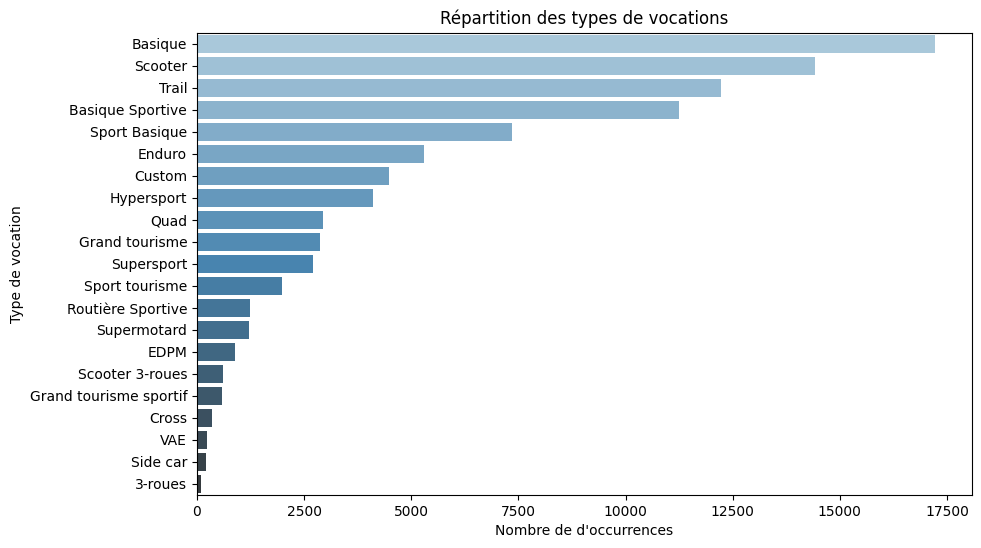

In [101]:
# Sorting data in descending order for plotting
vocation_freq_sorted = vocation_freq.sort_values(by='count', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='count', y='vocation_cd', data=vocation_freq_sorted, palette="Blues_d")
plt.title("Répartition des types de vocations")
plt.xlabel("Nombre de d'occurrences")
plt.ylabel("Type de vocation")
plt.show()


L'analyse révèle une grande diversité dans les types de vocations, avec 21 types différents, ce qui reflète la variété des préférences et des besoins des consommateurs.

Parmi ces catégories, on distingue une prédominance de types tels que le basique et les scooters, qui ensemble, représentent environ 35% du CAHT. Leur popularité peut s'expliquer par leur polyvalence et leur facilité d'utilisation, les rendant attrayants pour un large éventail de clients.

Une autre catégorie notable inclut des types spécialisés comme les trails et les basiques sportives, indiquant un intérêt marqué pour des motos adaptées à des usages spécifiques, tels que le tout-terrain ou la performance sportive.

Bien que moins courants et occupant une part de marché plus limitée, les autres types de vocations témoignent également de la diversification des types de véhicules. Il est donc important pour l'entreprise de consolider sa position sur les segments dominants tout en explorant activement de nouveaux marchés.

### Marque

In [102]:
marque_freq = datafinal['marque_vehicule_lb'].value_counts(normalize=True)
marque_freq

marque_vehicule_lb
YAMAHA      0.166125
HONDA       0.145541
SUZUKI      0.086258
BMW         0.074742
KAWASAKI    0.071286
              ...   
Zipper      0.000011
KANDI       0.000011
KALKHOFF    0.000011
TX          0.000011
Flyblade    0.000011
Name: proportion, Length: 909, dtype: float64

In [103]:
invalid_line_numbers = [65291, 73915, 82146]  # Adjusted for zero-indexing
invalid_marque = datafinal.iloc[invalid_line_numbers]
invalid_marque['marque_vehicule_lb']

65291                     Ino
73915           riese & mller
82146    Mi lectric scooter 3
Name: marque_vehicule_lb, dtype: object

In [104]:
data_marque = datafinal.drop(invalid_line_numbers)

In [105]:
marque_freq_valid = data_marque['marque_vehicule_lb'].value_counts(normalize=True).reset_index()
marque_freq_valid.columns = ['marque_vehicule_lb', 'percent']
marque_freq_valid['cum_pct'] = marque_freq_valid['percent'].cumsum()
marque_freq_valid['percent'] *= 100
marque_freq_valid['cum_pct'] *= 100
marque_freq_valid

,marque_vehicule_lb,percent,cum_pct
0,YAMAHA,16.613038,16.613038
1,HONDA,14.554555,31.167593
2,SUZUKI,8.626125,39.793718
3,BMW,7.474459,47.268177
4,KAWASAKI,7.128850,54.397027
...,...,...,...
901,micro,0.001083,99.995666
902,winora,0.001083,99.996750
903,BENOIST,0.001083,99.997833
904,flyer,0.001083,99.998917


In [106]:
top_10_marques = marque_freq_valid.head(10)
top_10_marques

,marque_vehicule_lb,percent,cum_pct
0,YAMAHA,16.613038,16.613038
1,HONDA,14.554555,31.167593
2,SUZUKI,8.626125,39.793718
3,BMW,7.474459,47.268177
4,KAWASAKI,7.128850,54.397027
5,KTM,4.413820,58.810847
6,TRIUMPH,3.790858,62.601705
7,DUCATI,3.146228,65.747933
8,PIAGGIO,3.019469,68.767402
9,HARLEY-DAVIDSON,2.945797,71.713199


La diversité des marques de motos assurées est remarquable, avec 903 marques différentes. Néanmoins, il est pertinent de se concentrer sur les 10 marques les plus assurées, car elles représentent plus de 70% du total des marques et 75% du chiffre d'affaires hors taxes (CAHT).

Parmi celles-ci, les grandes marques japonaises occupent une position dominante, avec près de 47% de parts de marché. Cette prédominance s'explique par leur réputation de qualité et de fiabilité.

En outre, les marques européennes et américaines sont aussi significatives, chacune se distinguant par son positionnement et son image de marque spécifiques.

Comprendre ces dynamiques de marché est essentiel pour affiner les stratégies d'assurance, gérer efficacement les risques et élaborer des campagnes de marketing ciblées.

# Synthèse, actions proposées et conclusion

## Synthèse
La procédure des analyses financières, démographiques, géographiques, et de préférences de produits pour Zenor révèle plusieurs axes stratégiques clés pour l'entreprise afin d'atteindre ses objectifs de direction générale :

1. **Situation financière et performance des produits :** Les formules d'assurance intégrale tels que « Tous Accidents » génèrent le plus gros chiffre d'affaires, ce qui indique une inclinaison des clients vers des solutions d'assurance complètes. Les offres de base, telles que les formules « Responsabilité Civile » et « Vol », maintiennent une solide performance, suggérant que les fondamentaux restent essentiels pour une majorité de clients.
   
   La préférence des clients pour les paiements annuels et mensuels suggère une demande pour des options de paiement flexibles, facilitant la gestion financière personnelle des clients et offrant une prévisibilité des flux de trésorerie pour Zenor.
   
   Les produits « Standard » et « Authentique » représentent la majorité du chiffre d'affaires des produits, confirmant leur position de pilier dans l'offre de Zenor. En même temps, l'existence de produits spécialisés et de niche démontre la capacité de Zenor à attirer et à servir des segments diversifiés de marché, bien que ceux-ci contribuent moins au chiffre d'affaires global.

2. **Ciblage démographique :** L'âge des sociétaires montre une forte représentation des moins de 30 ans et une présence significative des tranches d'âge intermédiaires. Zenor devrait continuer à développer des produits d'assurance adaptés aux jeunes adultes tout en optimisant ses offres pour les clients d'âge mûr, qui peuvent rechercher une couverture plus complète.

3. **Stratégie géographique :** La prédominance des sociétaires en Métropole versus l'OutreMer et la distribution inégale entre les différents bureaux de gestion indiquent la nécessité d'une stratégie de marché différenciée qui tient compte des spécificités régionales et optimise la présence dans les zones sous-représentées.

4. **Répartition socio-professionnelle :** La diversification socio-professionnelle des sociétaires de Zenor démontre une clientèle diversifiée, avec une présence notable d'employés, suivie par des cadres, des artisans commerçants, et d'autres catégories professionnelles. Cette variété indique que les offres d'assurance de Zenor attirent un large éventail de professions. Zenor peut créer des offres plus personnalisées qui répondent aux besoins uniques de chaque segment, favorisant ainsi une plus grande fidélisation et une expansion du marché.

5. **Préférences de souscription :** L'analyse des canaux de souscription a montré une préférence marquée pour le téléphone, indiquant que les sociétaires valorisent l'interaction directe et personnelle. Cependant, il existe un potentiel inexploité dans l'optimisation du canal Internet, en particulier pour attirer la clientèle plus jeune qui est à l'aise avec les technologies numériques. Renforcer la présence digitale de Zenor, améliorer l'expérience utilisateur en ligne et intégrer les technologies mobiles sont des stratégies clés pour saisir ce potentiel.

6. **Préférences de véhicules :** L'analyse des marques de motos les plus assurées montre une préférence pour les constructeurs japonais, suivie de marques européennes et américaines. Cette diversité marque une opportunité pour Zenor de peaufiner son offre d'assurance pour s'aligner avec la réputation et le positionnement de chaque marque, en particulier dans les segments premium et spécialisés.

   De plus, La prédominance des motos basiques et des scooters reflète une tendance vers des véhicules pratiques pour la vie quotidienne et l'utilisation urbaine. Cela indique une opportunité pour Zenor de concentrer ses ressources sur la consolidation de sa position dans ces segments tout en restant attentif aux niches de marché telles que les motos sportives et de loisirs, où des produits spécialisés peuvent être développés.

## Action proposées

Pour atteindre les objectifs de la direction générale, qui incluent l'augmentation des parts de marché, la réduction du taux de résiliation et l'attraction des jeunes de moins de 30 ans, Zenor devrait :
1.	**Amélioration de l'expérience de souscription en ligne :**
    - Capitaliser sur la tendance croissante à l'utilisation des services en ligne, en particulier parmi les clients plus jeunes, en améliorant l'interface utilisateur et en simplifiant le processus de souscription numérique.
    - Intégrer des outils d'intelligence artificielle et des chatbots pour fournir une aide instantanée et personnalisée lors de la souscription en ligne.
2.	**Personnalisation des produits pour les niches de marché :**
    -   Créer des offres sur mesure pour des niches de marché, telles que les motos spécialisées et les véhicules électriques, pour répondre à des besoins spécifiques.
    -   Établir des partenariats avec des clubs de motards, des associations et des groupes de loisirs pour offrir des polices groupées et personnalisées.
3.	**Stratégies tarifaires flexibles :**
    - Proposer des plans de paiement ajustables qui peuvent changer avec les circonstances financières du client, comme des options de report de paiement ou des ajustements de couverture.
4.	**Exploitation les données démographiques et comportementales pour affiner ses stratégies de cross-selling et de fidélisation :**
    - Développer des produits d'assurance adaptés aux femmes.
    - Développer des campagnes marketing ciblées selon les tranches d'âge et les préférences régionales.
    - Créer des partenariats avec des marques de motos les plus populaires pour des offres conjointes.
    - Offrir des services et des couvertures adaptés aux spécificités des différents types de véhicules.


## Conclusion
En conclusion, l'analyse complète des données de Zenor dévoile une entreprise avec un potentiel considérable de croissance et d'optimisation. 
Cependant, l’entreprise est face à un marché varié et complexe, et doit donc poursuivre une stratégie ciblée et data-driven pour optimiser ses opérations et saisir les opportunités de marché.
En exploitant les insights des données client, Zenor serait bien positionnée pour répondre aux attentes de sa direction et aux besoins de ses clients, tout en consolidant sa présence sur le marché de l'assurance des deux-roues.


## Exporter les données traitées pour PowerBI

In [107]:
datafinal_export = datafinal.copy()
variables = datafinal_export.columns.to_list()
variables

['societaire_nu',
 'personne_id',
 'code_postal_cd',
 'societaire_anciennete_dt',
 'societaire_sexe_cd',
 'societaire_naissance_dt',
 'bureau_gestion_cd',
 'societaire_drom_pom_com_in',
 'societaire_csp_cd',
 'contrat_id',
 'canal_souscription_cd',
 'saisie_contrat_dt',
 'contrat_distrib_lb',
 'produit_cd',
 'formule_cd',
 'prime_annuelle_ht_mt',
 'partenaire_cd',
 'fractionnement_cd',
 'mise_circulation_dt',
 'vocation_cd',
 'marque_vehicule_lb',
 'year',
 'month']

In [108]:
datafinal_export['societaire_csp_cd'] = datafinal_export['societaire_csp_cd'].fillna(-1)
datafinal_export['dpt'] = datafinal_export['code_postal_cd'].astype(str).str.zfill(5).str[:2]

In [109]:
datafinal_export['dpt'].replace(dpt_fmt, inplace=True)
datafinal_export['societaire_sexe_cd'].replace(societaire_sexe_fmt, inplace=True)
datafinal_export['bureau_gestion_cd'].replace(bureau_gestion_fmt, inplace=True)
datafinal_export['societaire_drom_pom_com_in'].replace(societaire_drom_pom_com_fmt, inplace=True)
datafinal_export['societaire_csp_cd'].replace(societaire_csp_fmt, inplace=True)
datafinal_export['canal_souscription_cd'].replace(canal_souscription_fmt, inplace=True)
datafinal_export['produit_cd'].replace(produit_fmt, inplace=True)
datafinal_export['partenaire_cd'] = datafinal_export['partenaire_cd'].apply(lambda x: partenaire_fmt(x))
datafinal_export['fractionnement_cd'].replace(fractionnement_fmt, inplace=True)
datafinal_export['vocation_cd'].replace(vocation_fmt, inplace=True)


In [110]:
datafinal_export.head()

,societaire_nu,personne_id,code_postal_cd,societaire_anciennete_dt,societaire_sexe_cd,societaire_naissance_dt,bureau_gestion_cd,societaire_drom_pom_com_in,societaire_csp_cd,contrat_id,canal_souscription_cd,saisie_contrat_dt,contrat_distrib_lb,produit_cd,formule_cd,prime_annuelle_ht_mt,partenaire_cd,fractionnement_cd,mise_circulation_dt,vocation_cd,marque_vehicule_lb,year,month,dpt
0,956602,1095021,78630,06Sep2020,Homme,1973-03-16,Paris Lyon,Métropole,Non spécifié,1262361,Téléphone,2020-09-09,En direct,Standard,PSTD3,294.42,Vente directe,Annuel,01Jun2013,Trail,BMW,2020,9,Yvelines
1,966728,2039456,98870,01Jan2021,Homme,1965-04-17,Nouvelle Calédonie,Outre-Mer,Non spécifié,1307994,Bureau,2022-05-03,Courtage,Authentique,PAUTH2,187.91,Partenaire,Annuel,01Jan2007,Basique,KAWASAKI,2022,5,Outre-mer
2,967063,2174302,54280,01Jan2021,Homme,1965-09-17,Metz,Métropole,Non spécifié,1309485,Bureau,2020-11-03,En direct,Standard,PSTD3,379.26,Vente directe,Annuel,01Aug2018,Trail,HONDA,2020,11,Meurthe-et-Moselle
3,967083,2180790,88500,01Jan2021,Homme,1964-01-08,Strasbourg,Métropole,Non spécifié,1309567,Bureau,2023-07-12,En direct,Standard,PSTD3,545.49,Vente directe,Mensuel,01Jul2017,Basique Sportive,BMW,2023,7,Vosges
4,967144,2160184,06000,27Nov2020,Homme,1973-07-25,Nice,Métropole,Non spécifié,1309872,Téléphone,2023-09-23,En direct,Authentique,PAUTH1,299.84,Vente directe,Annuel,01Mar2007,Scooter,YAMAHA,2023,9,Alpes-Maritimes


In [111]:
datafinal_export.to_csv('data_powerbi')